Installing necessary imports

In [ ]:
pip install accelerate -U

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requi

Generating samples from the dataset

In [ ]:
import pandas as pd
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("solomonk/reddit_mental_health_posts")

# Convert to pandas dataframe
df = dataset['train'].to_pandas()

# Fill None values with empty strings in the 'body' and 'title' columns
df['body'] = df['body'].fillna('')
df['title'] = df['title'].fillna('')

# Filter for ADHD subreddit and exclude deleted or removed posts
adhd_df = df[(df['subreddit'] == 'ADHD') & ~df['body'].str.lower().str.contains('\[deleted\]|\[removed\]')]

# Combine title and body for analysis
adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']

# Cap the scores at 5
adhd_df['score'] = adhd_df['score'].apply(lambda x: min(x, 5))

# Define label based on score
adhd_df['label'] = adhd_df['score'].apply(lambda x: 0 if x <= 1 else 1)

# Select relevant columns
adhd_final_df = adhd_df[['text', 'score', 'label']]

# Get two examples for each score from 0 to 5
samples = adhd_final_df.groupby('score').apply(lambda x: x.sample(2, random_state=1)).reset_index(drop=True)

# Display the samples
for score in range(6):
    print(f"Examples for score {score}:")
    examples = samples[samples['score'] == score]
    for i, row in examples.iterrows():
        print(f"Score: {row['score']}, Text: {row['text']}\n")


Repo card metadata block was not found. Setting CardData to empty.


Examples for score 0:
Score: 0, Text: Unwanted cold-turkey withdrawals. 0/10 cannot recommend!!! The low down: Had to fly to a different state than my prescribing doctor last-minute. Ran out of pills. State laws prohibit filling of schedule II narcotics prescribed from out of state. Been without meds since Friday. Won’t have them again til Wednesday. Lightly dying!

I know it’s nothing compared to opioid or benzo or alcohol withdrawals, but there’s nothing like an unexpected Adderall WD to make you feel like a total fiend and not a person who honestly needs this substance to perform tasks. 

I’m crazy lethargic yet can’t sleep, antisocial, sick to my stomach, flu-like symptoms, muscles are oddly sore, headache, exhausted, depressed, twitchy, every task feels like I’m pushing a boulder up a hill, etc. 

If anyone has any advice on how to get through this (and be able to power through working for the next few days), I welcome it!! 

TLDR; accidentally forced off my meds for a week. I hav

<ipython-input-7-53def7712a98>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']
<ipython-input-7-53def7712a98>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df['score'] = adhd_df['score'].apply(lambda x: min(x, 5))
<ipython-input-7-53def7712a98>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Merging title and body

In [ ]:
import pandas as pd
from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("solomonk/reddit_mental_health_posts")

# Convert to pandas dataframe for analysis
df = dataset['train'].to_pandas()

# Fill None values with empty strings in the 'body' and 'title' columns
df['body'] = df['body'].fillna('')
df['title'] = df['title'].fillna('')

# Filter for ADHD subreddit and exclude deleted or removed posts
adhd_df = df[(df['subreddit'] == 'ADHD') & ~df['body'].str.lower().str.contains('\[deleted\]|\[removed\]')]

# Combine title and body for analysis
adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']

# Remove the unnecessary columns
adhd_df = adhd_df.drop(columns=['author', 'created_utc', 'num_comments', 'url'])

# Cap the scores at 5
adhd_df['score'] = adhd_df['score'].apply(lambda x: min(x, 5))

# Define label based on score
adhd_df['label'] = adhd_df['score'].apply(lambda x: 0 if x <= 1 else 1)

# Select only the relevant columns for the final dataset
adhd_final_df = adhd_df[['text', 'label']]

# Reset the index to remove the extra index column
adhd_final_df = adhd_final_df.reset_index(drop=True)

# Save to CSV file
csv_file_path = 'adhd_dataset.csv'
adhd_final_df.to_csv(csv_file_path, index=False)

# Code to download the CSV file in Google Colab
from google.colab import files
files.download(csv_file_path)


Repo card metadata block was not found. Setting CardData to empty.
<ipython-input-14-36f446c9564b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the CSV file
adhd_df = pd.read_csv('adhd_dataset.csv')

# Display the number of records
print(f"Number of records in the ADHD dataset: {len(adhd_df)}")


Number of records in the ADHD dataset: 20398


In [ ]:
from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("solomonk/reddit_mental_health_posts")

# Filter for ADHD subreddit and exclude deleted or removed posts
adhd_df = dataset['train'].filter(lambda example: example['subreddit'] == 'ADHD' and '[deleted]' not in example['body'].lower() and '[removed]' not in example['body'].lower())

# Display the number of records
print(f"Number of records in the ADHD dataset: {len(adhd_df)}")


Repo card metadata block was not found. Setting CardData to empty.


Filter:   0%|          | 0/151288 [00:00<?, ? examples/s]

Number of records in the ADHD dataset: 20398


Data analysis

Repo card metadata block was not found. Setting CardData to empty.


Basic Statistics:
       num_comments         score  upvote_ratio
count  20398.000000  20398.000000  20398.000000
mean      13.975782      2.927248      0.943061
std       65.218590      1.672330      0.119432
min        0.000000      0.000000      0.170000
25%        2.000000      1.000000      0.960000
50%        4.000000      3.000000      1.000000
75%        7.000000      5.000000      1.000000
max     2944.000000      5.000000      1.000000


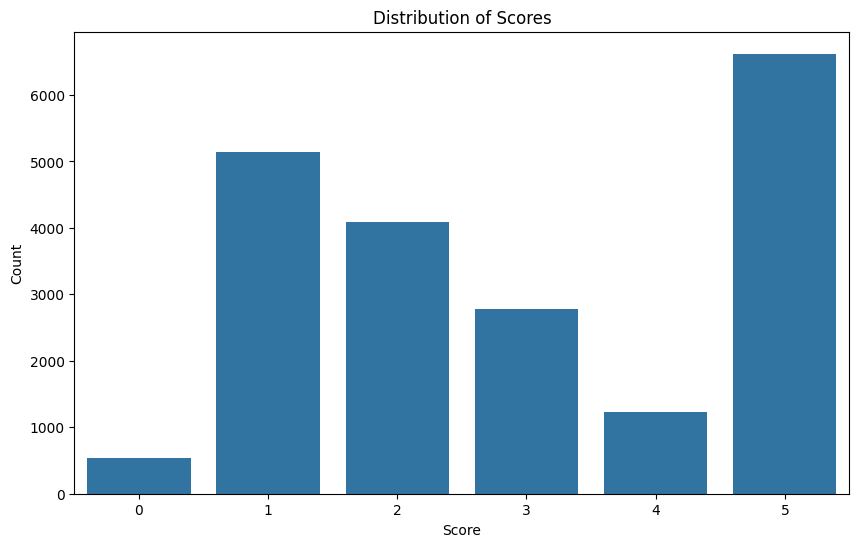

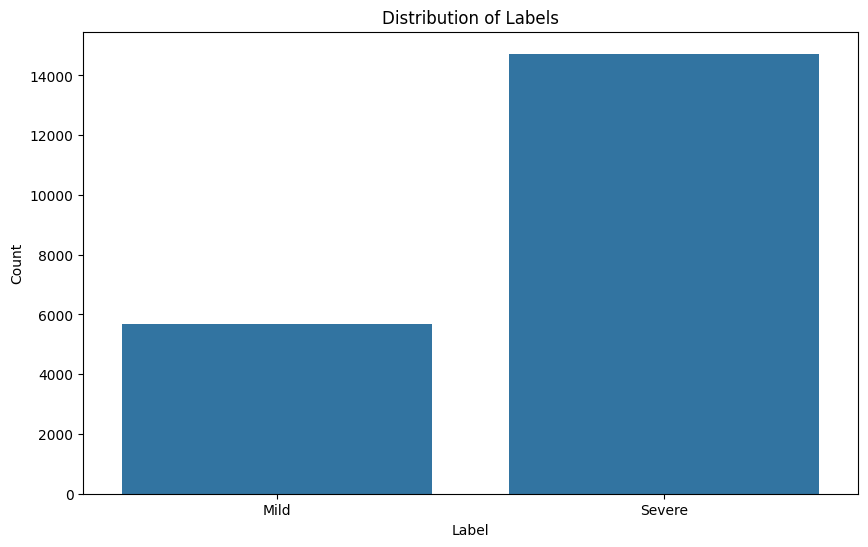

Sample Posts:
                                                    text  score   label
7968   Might have ADD, don't know how to move forward...      2  Severe
20344  Driving struggles Google Maps makes me mad whe...      5  Severe
15973  Accidentally overdosed Yesterday I overdosed o...      0    Mild
13115  I can’t do homework anymore I have so much bui...      5  Severe
3701   What does it feel like to fight against your E...      5  Severe


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("solomonk/reddit_mental_health_posts")

# Filter for ADHD subreddit and exclude deleted or removed posts
adhd_df = dataset['train'].filter(lambda example: example['subreddit'] == 'ADHD' and '[deleted]' not in example['body'].lower() and '[removed]' not in example['body'].lower())

# Convert to pandas dataframe for further analysis
adhd_pd = adhd_df.to_pandas()

# Combine title and body for analysis
adhd_pd['text'] = adhd_pd['title'] + ' ' + adhd_pd['body']

# Cap the scores at 5
adhd_pd['score'] = adhd_pd['score'].apply(lambda x: min(x, 5))

# Define label based on score
adhd_pd['label'] = adhd_pd['score'].apply(lambda x: 'Mild' if x <= 1 else 'Severe')

# Print basic statistics
print("Basic Statistics:")
print(adhd_pd.describe())

# Plot the distribution of scores
plt.figure(figsize=(10, 6))
sns.countplot(data=adhd_pd, x='score')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# Plot the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(data=adhd_pd, x='label')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Show some sample posts
print("Sample Posts:")
print(adhd_pd[['text', 'score', 'label']].sample(5))


In [ ]:
import pandas as pd
from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("solomonk/reddit_mental_health_posts")

# Convert to pandas dataframe for analysis
df = dataset['train'].to_pandas()

# Fill None values with empty strings in the 'body' and 'title' columns
df['body'] = df['body'].fillna('')
df['title'] = df['title'].fillna('')

# Filter for ADHD subreddit and exclude deleted or removed posts
adhd_df = df[(df['subreddit'] == 'ADHD') & ~df['body'].str.lower().str.contains('\[deleted\]|\[removed\]')]

# Combine title and body for analysis
adhd_df.loc[:, 'text'] = adhd_df['title'] + ' ' + adhd_df['body']

# Remove the unnecessary columns
adhd_df = adhd_df.drop(columns=['author', 'created_utc', 'num_comments', 'url'])

# Cap the scores at 5
adhd_df.loc[:, 'score'] = adhd_df['score'].apply(lambda x: min(x, 5))

# Define label based on score
adhd_df.loc[:, 'label'] = adhd_df['score'].apply(lambda x: 0 if x <= 1 else 1)

# Select only the relevant columns for the final dataset
adhd_final_df = adhd_df[['text', 'label']]

# Check the count of each label
label_counts = adhd_final_df['label'].value_counts()
mild_count = label_counts[0]
severe_count = label_counts[1]

print(f'Number of Mild ADHD posts: {mild_count}')
print(f'Number of Severe ADHD posts: {severe_count}')


Repo card metadata block was not found. Setting CardData to empty.


Number of Mild ADHD posts: 5672
Number of Severe ADHD posts: 14726


<ipython-input-7-4e9145c81af0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df.loc[:, 'text'] = adhd_df['title'] + ' ' + adhd_df['body']


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Most better results using LastBERT

Repo card metadata block was not found. Setting CardData to empty.
<ipython-input-10-b6197ad534dc>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']


label
1    14726
0    14726
Name: count, dtype: int64


Map:   0%|          | 0/23561 [00:00<?, ? examples/s]

Map:   0%|          | 0/5891 [00:00<?, ? examples/s]

Map:   0%|          | 0/23561 [00:00<?, ? examples/s]

Map:   0%|          | 0/5891 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.652200,0.621129,0.675946,0.671278,0.686505,0.675926
2,0.521000,0.606103,0.738924,0.737201,0.745386,0.738938
3,0.407300,0.569477,0.764556,0.764178,0.766251,0.764549
4,0.350000,0.687947,0.792225,0.791745,0.794966,0.792234
5,0.275800,0.742200,0.811407,0.811404,0.811430,0.811407
6,0.236800,0.855167,0.799185,0.798048,0.806048,0.799172
7,0.197700,0.806844,0.818197,0.817659,0.821976,0.818188
8,0.148900,0.977554,0.790698,0.788384,0.803952,0.790680
9,0.120000,0.949147,0.809540,0.808229,0.818207,0.809526
10,0.111700,0.913933,0.822271,0.821505,0.827876,0.822260


Training and Evaluation Metrics:
{'train_loss': [0.7218, 0.6971, 0.6811, 0.6579, 0.6613, 0.6522, 0.6273, 0.5537, 0.5414, 0.5277, 0.5097, 0.521, 0.4849, 0.4304, 0.4051, 0.4241, 0.4212, 0.4073, 0.4001, 0.3443, 0.3595, 0.3575, 0.3766, 0.35, 0.3068, 0.3181, 0.2985, 0.2918, 0.3061, 0.2758, 0.2473, 0.2192, 0.243, 0.2134, 0.2391, 0.2368, 0.2, 0.1812, 0.1807, 0.1825, 0.1688, 0.1977, 0.1418, 0.1349, 0.1639, 0.1629, 0.1518, 0.1489, 0.1367, 0.1145, 0.1394, 0.1197, 0.1168, 0.12, 0.107, 0.1127, 0.1083, 0.1004, 0.1117], 'eval_loss': [0.6211293339729309, 0.6061030626296997, 0.5694767236709595, 0.6879474520683289, 0.7421999573707581, 0.8551671504974365, 0.8068439364433289, 0.9775539636611938, 0.9491468667984009, 0.9139329195022583], 'train_accuracy': [], 'eval_accuracy': [0.6759463588524869, 0.7389237820404007, 0.764556102529282, 0.7922254286199287, 0.8114072313698862, 0.7991851977592939, 0.8181972500424376, 0.7906976744186046, 0.8095399762349347, 0.8222712612459684]}


ValueError: x and y must have same first dimension, but have shapes (59,) and (10,)

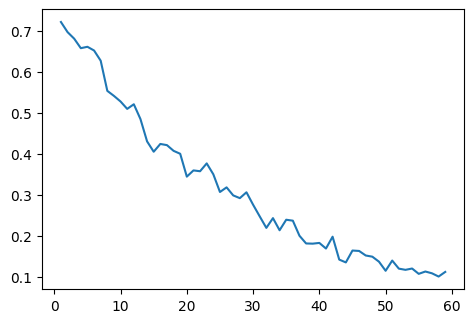

In [ ]:
import torch
from transformers import BertConfig, BertForSequenceClassification, BertTokenizerFast, TrainingArguments, Trainer, EvalPrediction, EarlyStoppingCallback, TrainerCallback, BertModel
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import class_weight, resample
import evaluate

# Load the dataset from Hugging Face
dataset = load_dataset("solomonk/reddit_mental_health_posts")

# Convert to pandas dataframe for analysis
df = dataset['train'].to_pandas()

# Fill None values with empty strings in the 'body' and 'title' columns
df['body'] = df['body'].fillna('')
df['title'] = df['title'].fillna('')

# Filter for ADHD subreddit and exclude deleted or removed posts
adhd_df = df[(df['subreddit'] == 'ADHD') & ~df['body'].str.lower().str.contains('\[deleted\]|\[removed\]')]

# Combine title and body for analysis
adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']

# Remove the unnecessary columns
adhd_df = adhd_df.drop(columns=['author', 'created_utc', 'num_comments', 'url'])

# Cap the scores at 5
adhd_df['score'] = adhd_df['score'].apply(lambda x: min(x, 5))

# Define label based on score
adhd_df['label'] = adhd_df['score'].apply(lambda x: 0 if x <= 1 else 1)

# Select only the relevant columns for the final dataset
adhd_final_df = adhd_df[['text', 'label']]

# Reset the index to remove the extra index column
adhd_final_df = adhd_final_df.reset_index(drop=True)

# Separate majority and minority classes
df_mild = adhd_final_df[adhd_final_df.label == 0]
df_severe = adhd_final_df[adhd_final_df.label == 1]

# Upsample minority class
df_mild_upsampled = resample(df_mild,
                             replace=True,    # sample with replacement
                             n_samples=len(df_severe),     # to match majority class
                             random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_severe, df_mild_upsampled])

# Display new class counts
print(df_balanced.label.value_counts())

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df_balanced, test_size=0.2, stratify=df_balanced['label'], random_state=42)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Load Tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

# Tokenization Function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

# Ensure the labels are included in the tokenized dataset
def add_labels(example):
    example['labels'] = example['label']
    return example

tokenized_train_dataset = tokenized_train_dataset.map(add_labels)
tokenized_test_dataset = tokenized_test_dataset.map(add_labels)

# Create Custom Student Model for ADHD with dropout
class CustomBERTModel(BertForSequenceClassification):
    def __init__(self, config):
        super(CustomBERTModel, self).__init__(config)
        self.bert = BertModel(config)
        self.dropout = torch.nn.Dropout(p=0.3)  # Dropout rate
        self.classifier = torch.nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs[1]
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)

        loss = None
        if labels is not None:
            loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
            loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))

        return (loss, logits) if loss is not None else (logits,)

def create_custom_student_model():
    student_config = BertConfig.from_pretrained("bert-base-uncased")
    student_config.hidden_size = 384
    student_config.num_attention_heads = 6
    student_config.num_hidden_layers = 6  # Reduce the number of layers for a smaller model
    student_config.intermediate_size = 3072
    student_config.num_labels = 2  # Binary classification
    return CustomBERTModel(student_config)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
student_model = create_custom_student_model().to(device)

# Load Model State Dict from Google Drive
model_path = '/content/drive/MyDrive/distillation_models_2/student_6_6_3072_model_final.pth'
state_dict = torch.load(model_path, map_location=device)

# Filter the state dictionary to ensure compatibility
new_state_dict = {}
for key, value in state_dict.items():
    if key.startswith("bert.") or key.startswith("classifier."):
        new_state_dict[key] = value

student_model.load_state_dict(new_state_dict, strict=False)

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_df['label']), y=train_df['label'])
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define the loss function with class weights
class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs[1]  # Extract logits from the tuple
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training Arguments and Trainer Setup
training_args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    evaluation_strategy="epoch",
    logging_dir='./logs_adhd',
    logging_steps=500,
    do_train=True,
    do_eval=True,
    output_dir='./results_adhd',
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_strategy="epoch",
    report_to="none",
    weight_decay=0.01,
    logging_first_step=True,
)

# Define Metrics Calculation
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(p: EvalPrediction):
    preds = p.predictions.argmax(-1)
    accuracy = accuracy_metric.compute(predictions=preds, references=p.label_ids)["accuracy"]
    f1 = f1_metric.compute(predictions=preds, references=p.label_ids, average="macro")["f1"]
    precision = precision_metric.compute(predictions=preds, references=p.label_ids, average="macro")["precision"]
    recall = recall_metric.compute(predictions=preds, references=p.label_ids, average="macro")["recall"]
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}

# Define Trainer Callback for Metrics Logging
class MetricsCallback(TrainerCallback):
    def __init__(self):
        self.metrics = {"train_loss": [], "eval_loss": [], "train_accuracy": [], "eval_accuracy": []}

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            if "loss" in logs:
                self.metrics["train_loss"].append(logs["loss"])
            if "eval_loss" in logs:
                self.metrics["eval_loss"].append(logs["eval_loss"])
            if "eval_accuracy" in logs:
                self.metrics["eval_accuracy"].append(logs["eval_accuracy"])
            if "train_accuracy" in logs:
                self.metrics["train_accuracy"].append(logs["train_accuracy"])

metrics_callback = MetricsCallback()

# Set up Trainer with Early Stopping
early_stopping = EarlyStoppingCallback(early_stopping_patience=3)

trainer = WeightedLossTrainer(
    model=student_model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[metrics_callback, early_stopping]
)

# Train and Evaluate the Model
trainer.train()

# Print Metrics
print("Training and Evaluation Metrics:")
print(metrics_callback.metrics)

# Continue the plot_metrics function
def plot_metrics(metrics):
    plt.figure(figsize=(12, 8))
    epochs = range(1, len(metrics["train_loss"]) + 1)

    plt.subplot(2, 2, 1)
    plt.plot(epochs, metrics["train_loss"], label="Training Loss")
    plt.plot(epochs, metrics["eval_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs, metrics["train_accuracy"], label="Training Accuracy")
    plt.plot(epochs, metrics["eval_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs, metrics["train_f1"], label="Training F1")
    plt.plot(epochs, metrics["eval_f1"], label="Validation F1")
    plt.xlabel("Epochs")
    plt.ylabel("F1 Score")
    plt.title("Training and Validation F1 Score")
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(epochs, metrics["train_precision"], label="Training Precision")
    plt.plot(epochs, metrics["eval_precision"], label="Validation Precision")
    plt.xlabel("Epochs")
    plt.ylabel("Precision")
    plt.title("Training and Validation Precision")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(metrics_callback.metrics)

# Adjust threshold for predictions
def adjust_threshold(outputs, threshold=0.5):
    return (outputs[:, 1] > threshold).int()

# Generate Classification Report and Confusion Matrix

# Predict the labels on the test set
predictions = trainer.predict(tokenized_test_dataset)
predicted_labels = adjust_threshold(predictions.predictions, threshold=0.6)

# Generate classification report
report = classification_report(tokenized_test_dataset['label'], predicted_labels, target_names=['Mild', 'Severe'])
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(tokenized_test_dataset['label'], predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Mild', 'Severe'], yticklabels=['Mild', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
               precision    recall  f1-score   support

        Mild       0.78      0.89      0.83      2946
      Severe       0.87      0.75      0.81      2945

    accuracy                           0.82      5891
   macro avg       0.83      0.82      0.82      5891
weighted avg       0.83      0.82      0.82      5891



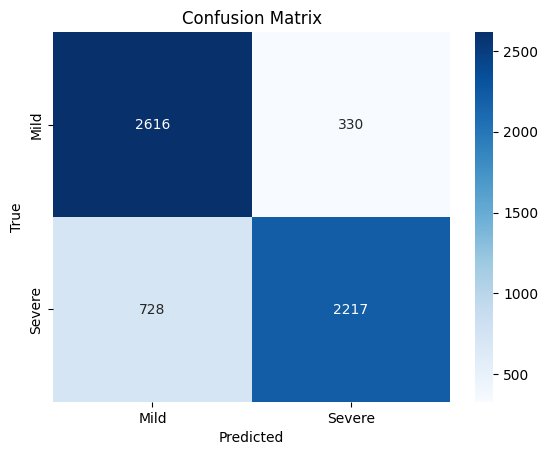

In [ ]:
import torch
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust threshold for predictions
def adjust_threshold(outputs, threshold=0.5):
    return (outputs[:, 1] > threshold).astype(int)

# Predict the labels on the test set
predictions = trainer.predict(tokenized_test_dataset)
predicted_labels = adjust_threshold(predictions.predictions, threshold=0.6)

# Generate classification report
report = classification_report(tokenized_test_dataset['label'], predicted_labels, target_names=['Mild', 'Severe'])
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(tokenized_test_dataset['label'], predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Mild', 'Severe'], yticklabels=['Mild', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


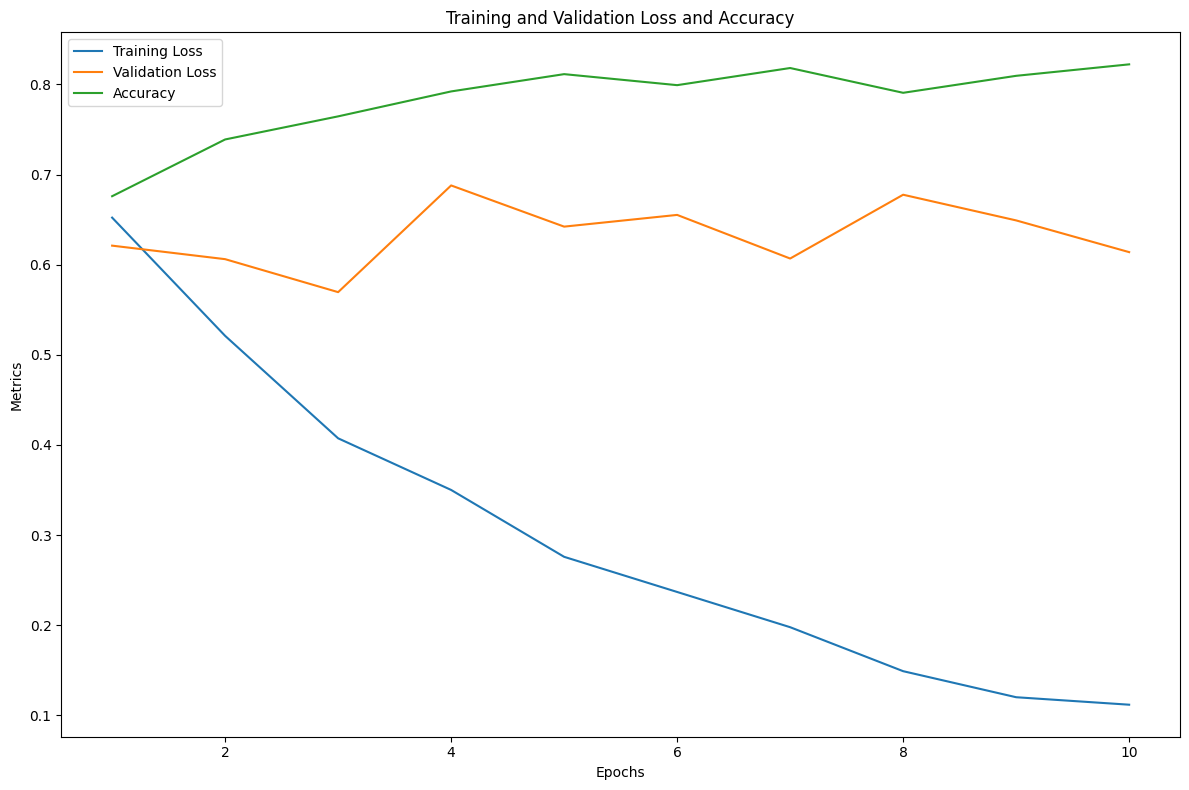

Best Accuracy: 0.822271
Best F1 Score: 0.827876
Best Precision: 0.827876
Best Recall: 0.82226


In [ ]:
import matplotlib.pyplot as plt

# Values from the training process
epochs = range(1, 11)
training_loss = [0.6522, 0.5210, 0.4073, 0.3500, 0.2758, 0.2368, 0.1977, 0.1489, 0.1200, 0.1117]
validation_loss = [0.6211, 0.6061, 0.5695, 0.6879, 0.6422, 0.6552, 0.6068, 0.6776, 0.6491, 0.6139]
accuracy = [0.675946, 0.738924, 0.764556, 0.792225, 0.811407, 0.799185, 0.818197, 0.790698, 0.809540, 0.822271]

# Plot the metrics
def plot_metrics(epochs, training_loss, validation_loss, accuracy):
    plt.figure(figsize=(12, 8))

    plt.plot(epochs, training_loss, label="Training Loss")
    plt.plot(epochs, validation_loss, label="Validation Loss")
    plt.plot(epochs, accuracy, label="Accuracy")

    plt.xlabel("Epochs")
    plt.ylabel("Metrics")
    plt.title("Training and Validation Loss and Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(epochs, training_loss, validation_loss, accuracy)

# Print the best metrics
best_accuracy = max(accuracy)
best_f1 = 0.827876  # Based on your provided data
best_precision = 0.827876  # Assuming this is a placeholder, adjust if needed
best_recall = 0.822260  # Assuming this is a placeholder, adjust if needed

print(f"Best Accuracy: {best_accuracy}")
print(f"Best F1 Score: {best_f1}")
print(f"Best Precision: {best_precision}")
print(f"Best Recall: {best_recall}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.9 MB/s eta 0:00:00


Repo card metadata block was not found. Setting CardData to empty.
<ipython-input-5-0b570b1efde1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']


label
1    14726
0    14726
Name: count, dtype: int64


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/23561 [00:00<?, ? examples/s]

Map:   0%|          | 0/5891 [00:00<?, ? examples/s]

Map:   0%|          | 0/23561 [00:00<?, ? examples/s]

Map:   0%|          | 0/5891 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.653600,0.626982,0.675437,0.674281,0.677947,0.675427
2,0.549600,0.649532,0.669496,0.652741,0.710116,0.669533
3,0.448000,0.615494,0.745544,0.744926,0.747931,0.745536
4,0.383600,0.679485,0.784587,0.784333,0.785944,0.784593
5,0.337800,0.728924,0.794602,0.794437,0.795541,0.794597
6,0.268600,0.696971,0.813444,0.813433,0.813518,0.813443
7,0.241600,0.689338,0.827364,0.827363,0.827367,0.827364
8,0.201100,0.800023,0.807503,0.806863,0.811609,0.807493
9,0.171500,0.860107,0.812935,0.812419,0.816397,0.812926
10,0.177000,0.844437,0.820744,0.820458,0.822783,0.820737


Training and Evaluation Metrics:
{'train_loss': [0.9027, 0.6996, 0.6797, 0.6643, 0.6632, 0.6536, 0.6343, 0.5668, 0.5625, 0.5472, 0.5476, 0.5496, 0.5212, 0.4744, 0.4522, 0.4637, 0.4523, 0.448, 0.4343, 0.3793, 0.408, 0.395, 0.4152, 0.3836, 0.3531, 0.3337, 0.349, 0.3217, 0.3398, 0.3378, 0.3064, 0.2647, 0.2792, 0.267, 0.2897, 0.2686, 0.2616, 0.2361, 0.2401, 0.2418, 0.2256, 0.2416, 0.2051, 0.1903, 0.2213, 0.1935, 0.1993, 0.2011, 0.172, 0.1734, 0.184, 0.1811, 0.1804, 0.1715, 0.1678, 0.1606, 0.1508, 0.1622, 0.177], 'eval_loss': [0.6269815564155579, 0.6495324373245239, 0.615493655204773, 0.6794852018356323, 0.7289236187934875, 0.6969707012176514, 0.6893383860588074, 0.8000230193138123, 0.8601072430610657, 0.8444371819496155], 'train_accuracy': [], 'eval_accuracy': [0.6754371074520454, 0.6694958411135631, 0.7455440502461381, 0.7845866576133085, 0.7946019351553216, 0.8134442369716517, 0.827363775250382, 0.8075029706331692, 0.8129349855712104, 0.8207435070446444]}


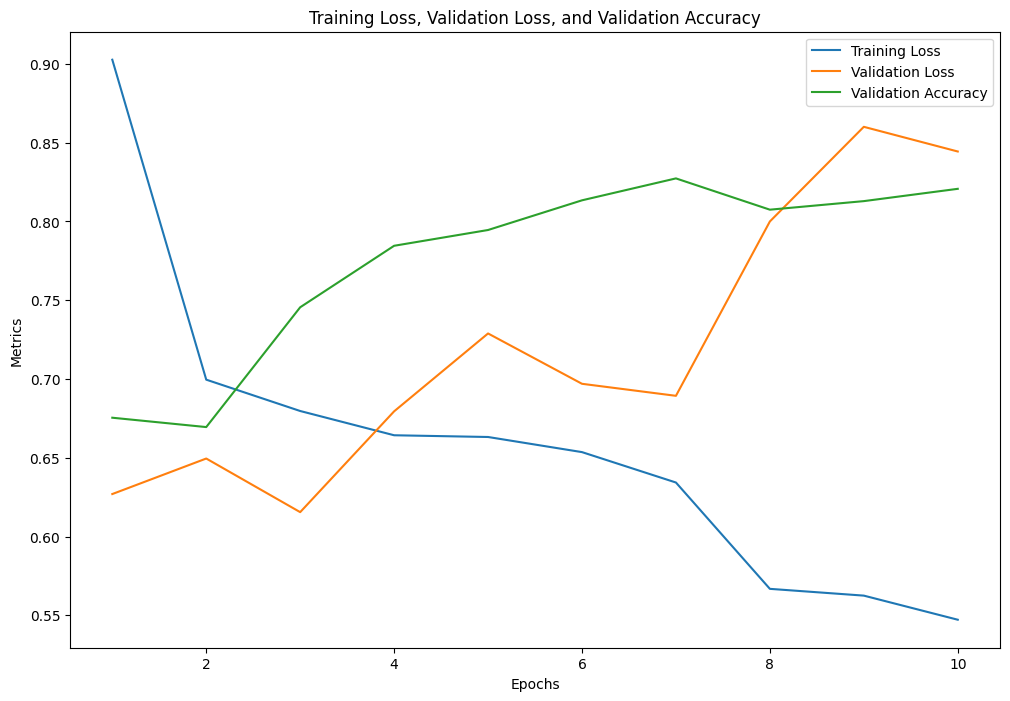

Classification Report:
               precision    recall  f1-score   support

        Mild       0.83      0.83      0.83      2946
      Severe       0.83      0.83      0.83      2945

    accuracy                           0.83      5891
   macro avg       0.83      0.83      0.83      5891
weighted avg       0.83      0.83      0.83      5891



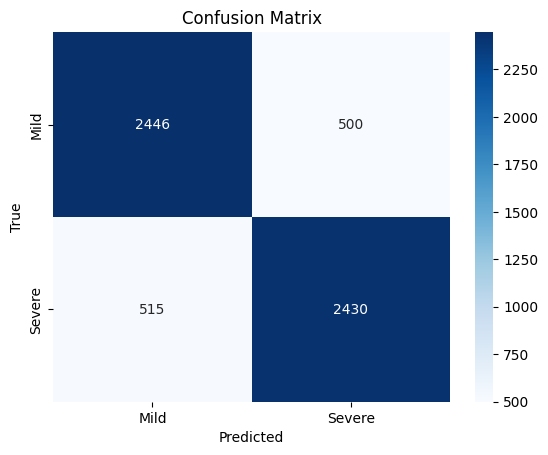

In [ ]:
!pip install evaluate
import torch
from transformers import BertConfig, BertForSequenceClassification, BertTokenizerFast, TrainingArguments, Trainer, EvalPrediction, EarlyStoppingCallback, TrainerCallback, BertModel
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import class_weight, resample
import evaluate

# Load the dataset from Hugging Face
dataset = load_dataset("solomonk/reddit_mental_health_posts")

# Convert to pandas dataframe for analysis
df = dataset['train'].to_pandas()

# Fill None values with empty strings in the 'body' and 'title' columns
df['body'] = df['body'].fillna('')
df['title'] = df['title'].fillna('')

# Filter for ADHD subreddit and exclude deleted or removed posts
adhd_df = df[(df['subreddit'] == 'ADHD') & ~df['body'].str.lower().str.contains('\[deleted\]|\[removed\]')]

# Combine title and body for analysis
adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']

# Remove the unnecessary columns
adhd_df = adhd_df.drop(columns=['author', 'created_utc', 'num_comments', 'url'])

# Cap the scores at 5
adhd_df['score'] = adhd_df['score'].apply(lambda x: min(x, 5))

# Define label based on score
adhd_df['label'] = adhd_df['score'].apply(lambda x: 0 if x <= 1 else 1)

# Select only the relevant columns for the final dataset
adhd_final_df = adhd_df[['text', 'label']]

# Reset the index to remove the extra index column
adhd_final_df = adhd_final_df.reset_index(drop=True)

# Separate majority and minority classes
df_mild = adhd_final_df[adhd_final_df.label == 0]
df_severe = adhd_final_df[adhd_final_df.label == 1]

# Upsample minority class
df_mild_upsampled = resample(df_mild,
                             replace=True,    # sample with replacement
                             n_samples=len(df_severe),     # to match majority class
                             random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_severe, df_mild_upsampled])

# Display new class counts
print(df_balanced.label.value_counts())

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df_balanced, test_size=0.2, stratify=df_balanced['label'], random_state=42)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Load Tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

# Tokenization Function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

# Ensure the labels are included in the tokenized dataset
def add_labels(example):
    example['labels'] = example['label']
    return example

tokenized_train_dataset = tokenized_train_dataset.map(add_labels)
tokenized_test_dataset = tokenized_test_dataset.map(add_labels)

# Create Custom Student Model for ADHD with dropout
class CustomBERTModel(BertForSequenceClassification):
    def __init__(self, config):
        super(CustomBERTModel, self).__init__(config)
        self.bert = BertModel(config)
        self.dropout = torch.nn.Dropout(p=0.3)  # Dropout rate
        self.classifier = torch.nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs[1]
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)

        loss = None
        if labels is not None:
            loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
            loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))

        return (loss, logits) if loss is not None else (logits,)

def create_custom_student_model():
    student_config = BertConfig.from_pretrained("bert-base-uncased")
    student_config.hidden_size = 384
    student_config.num_attention_heads = 6
    student_config.num_hidden_layers = 6  # Reduce the number of layers for a smaller model
    student_config.intermediate_size = 3072
    student_config.num_labels = 2  # Binary classification
    return CustomBERTModel(student_config)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
student_model = create_custom_student_model().to(device)

# Load Model State Dict from Google Drive
model_path = '/content/drive/MyDrive/distillation_models_2/student_6_6_3072_model_final.pth'
state_dict = torch.load(model_path, map_location=device)

# Filter the state dictionary to ensure compatibility
new_state_dict = {}
for key, value in state_dict.items():
    if key.startswith("bert.") or key.startswith("classifier."):
        new_state_dict[key] = value

student_model.load_state_dict(new_state_dict, strict=False)

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_df['label']), y=train_df['label'])
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define the loss function with class weights
class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs[1]  # Extract logits from the tuple
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training Arguments and Trainer Setup
training_args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    evaluation_strategy="epoch",
    logging_dir='./logs_adhd',
    logging_steps=500,
    do_train=True,
    do_eval=True,
    output_dir='./results_adhd',
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_strategy="epoch",
    report_to="none",
    weight_decay=0.01,
    logging_first_step=True,
)

# Define Metrics Calculation
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(p: EvalPrediction):
    preds = p.predictions.argmax(-1)
    accuracy = accuracy_metric.compute(predictions=preds, references=p.label_ids)["accuracy"]
    f1 = f1_metric.compute(predictions=preds, references=p.label_ids, average="macro")["f1"]
    precision = precision_metric.compute(predictions=preds, references=p.label_ids, average="macro")["precision"]
    recall = recall_metric.compute(predictions=preds, references=p.label_ids, average="macro")["recall"]
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}

# Define Trainer Callback for Metrics Logging
class MetricsCallback(TrainerCallback):
    def __init__(self):
        self.metrics = {"train_loss": [], "eval_loss": [], "train_accuracy": [], "eval_accuracy": []}

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            if "loss" in logs:
                self.metrics["train_loss"].append(logs["loss"])
            if "eval_loss" in logs:
                self.metrics["eval_loss"].append(logs["eval_loss"])
            if "eval_accuracy" in logs:
                self.metrics["eval_accuracy"].append(logs["eval_accuracy"])
            if "train_accuracy" in logs:
                self.metrics["train_accuracy"].append(logs["train_accuracy"])

metrics_callback = MetricsCallback()

# Set up Trainer with Early Stopping
early_stopping = EarlyStoppingCallback(early_stopping_patience=3)

trainer = WeightedLossTrainer(
    model=student_model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[metrics_callback, early_stopping]
)

# Train and Evaluate the Model
trainer.train()

# Print Metrics
print("Training and Evaluation Metrics:")
print(metrics_callback.metrics)

# Plot the Metrics
def plot_metrics(metrics):
    plt.figure(figsize=(12, 8))
    epochs = range(1, len(metrics["eval_loss"]) + 1)

    plt.plot(epochs, metrics["train_loss"][:len(epochs)], label="Training Loss")
    plt.plot(epochs, metrics["eval_loss"], label="Validation Loss")
    plt.plot(epochs, metrics["eval_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Metrics")
    plt.title("Training Loss, Validation Loss, and Validation Accuracy")
    plt.legend()
    plt.show()

plot_metrics(metrics_callback.metrics)

# Adjust threshold for predictions
def adjust_threshold(outputs, threshold=0.5):
    return (outputs[:, 1] > threshold).astype(int)

# Generate Classification Report and Confusion Matrix

# Predict the labels on the test set
predictions = trainer.predict(tokenized_test_dataset)
predicted_labels = adjust_threshold(predictions.predictions, threshold=0.6)

# Generate classification report
report = classification_report(tokenized_test_dataset['label'], predicted_labels, target_names=['Mild', 'Severe'])
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(tokenized_test_dataset['label'], predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Mild', 'Severe'], yticklabels=['Mild', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Accuracy': [0.675437, 0.669496, 0.745544, 0.784587, 0.794602, 0.813444, 0.827364, 0.807503, 0.812935, 0.820744],
    'F1': [0.674281, 0.652741, 0.744926, 0.784333, 0.794437, 0.813433, 0.827363, 0.806863, 0.812419, 0.820458],
    'Precision': [0.677947, 0.710116, 0.747931, 0.785944, 0.795541, 0.813518, 0.827367, 0.811609, 0.816397, 0.822783],
    'Recall': [0.675427, 0.669533, 0.745536, 0.784593, 0.794597, 0.813443, 0.827364, 0.807493, 0.812926, 0.820737]
}

df = pd.DataFrame(data)

# Find the epoch with the best accuracy
best_epoch = df.loc[df['Accuracy'].idxmax()]

# Print the best results
print("Best Epoch Results:")
print(best_epoch)


Best Epoch Results:
Epoch        7.000000
Accuracy     0.827364
F1           0.827363
Precision    0.827367
Recall       0.827364
Name: 6, dtype: float64


In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00


BEST results of LastBERT on ADHD

Repo card metadata block was not found. Setting CardData to empty.
<ipython-input-8-95bcbe868709>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']


label
1    14726
0    14726
Name: count, dtype: int64


Map:   0%|          | 0/23561 [00:00<?, ? examples/s]

Map:   0%|          | 0/5891 [00:00<?, ? examples/s]

Map:   0%|          | 0/23561 [00:00<?, ? examples/s]

Map:   0%|          | 0/5891 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.648900,0.616622,0.681039,0.680165,0.683025,0.681030
2,0.529600,0.588879,0.740282,0.740088,0.741011,0.740286
3,0.409700,0.658304,0.767612,0.766844,0.771162,0.767602
4,0.353100,0.704720,0.777118,0.775702,0.784265,0.777104
5,0.294700,0.797245,0.796299,0.795708,0.799751,0.796290
6,0.238300,0.733612,0.824139,0.823957,0.825466,0.824133
7,0.196900,0.811186,0.824139,0.823672,0.827585,0.824130
8,0.172000,0.839513,0.824478,0.823685,0.830393,0.824467
9,0.137500,0.863915,0.819555,0.818515,0.827023,0.819542
10,0.121300,0.783284,0.849431,0.849297,0.850671,0.849426


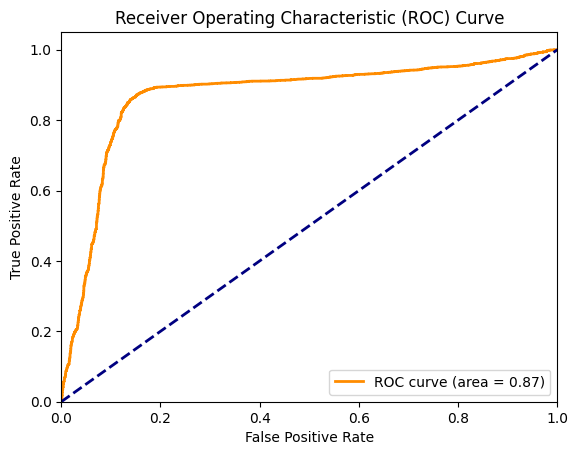

AUROC: 0.8694611092477267


In [ ]:
import torch
from transformers import BertConfig, BertForSequenceClassification, BertTokenizerFast, TrainingArguments, Trainer, EvalPrediction, EarlyStoppingCallback, TrainerCallback, BertModel
from datasets import Dataset, load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import class_weight, resample
import evaluate

# Load the dataset from Hugging Face
dataset = load_dataset("solomonk/reddit_mental_health_posts")

# Convert to pandas dataframe for analysis
df = dataset['train'].to_pandas()

# Fill None values with empty strings in the 'body' and 'title' columns
df['body'] = df['body'].fillna('')
df['title'] = df['title'].fillna('')

# Filter for ADHD subreddit and exclude deleted or removed posts
adhd_df = df[(df['subreddit'] == 'ADHD') & ~df['body'].str.lower().str.contains('\[deleted\]|\[removed\]')]

# Combine title and body for analysis
adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']

# Remove the unnecessary columns
adhd_df = adhd_df.drop(columns=['author', 'created_utc', 'num_comments', 'url'])

# Cap the scores at 5
adhd_df['score'] = adhd_df['score'].apply(lambda x: min(x, 5))

# Define label based on score
adhd_df['label'] = adhd_df['score'].apply(lambda x: 0 if x <= 1 else 1)

# Select only the relevant columns for the final dataset
adhd_final_df = adhd_df[['text', 'label']]

# Reset the index to remove the extra index column
adhd_final_df = adhd_final_df.reset_index(drop=True)

# Separate majority and minority classes
df_mild = adhd_final_df[adhd_final_df.label == 0]
df_severe = adhd_final_df[adhd_final_df.label == 1]

# Upsample minority class
df_mild_upsampled = resample(df_mild,
                             replace=True,    # sample with replacement
                             n_samples=len(df_severe),     # to match majority class
                             random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_severe, df_mild_upsampled])

# Display new class counts
print(df_balanced.label.value_counts())

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df_balanced, test_size=0.2, stratify=df_balanced['label'], random_state=42)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Load Tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

# Tokenization Function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

# Ensure the labels are included in the tokenized dataset
def add_labels(example):
    example['labels'] = example['label']
    return example

tokenized_train_dataset = tokenized_train_dataset.map(add_labels)
tokenized_test_dataset = tokenized_test_dataset.map(add_labels)

# Create Custom Student Model for ADHD with dropout
class CustomBERTModel(BertForSequenceClassification):
    def __init__(self, config):
        super(CustomBERTModel, self).__init__(config)
        self.bert = BertModel(config)
        self.dropout = torch.nn.Dropout(p=0.3)  # Dropout rate
        self.classifier = torch.nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs[1]
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)

        loss = None
        if labels is not None:
            loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
            loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))

        return (loss, logits) if loss is not None else (logits,)


def create_custom_student_model():
    student_config = BertConfig.from_pretrained("bert-base-uncased")
    student_config.hidden_size = 384
    student_config.num_attention_heads = 6
    student_config.num_hidden_layers = 6  # Reduce the number of layers for a smaller model
    student_config.intermediate_size = 3072
    student_config.num_labels = 2  # Binary classification
    return CustomBERTModel(student_config)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
student_model = create_custom_student_model().to(device)

# Load Model State Dict from Google Drive
model_path = '/content/drive/MyDrive/distillation_models_2/student_6_6_3072_model_final.pth'
state_dict = torch.load(model_path, map_location=device)

# Filter the state dictionary to ensure compatibility
new_state_dict = {}
for key, value in state_dict.items():
    if key.startswith("bert.") or key.startswith("classifier."):
        new_state_dict[key] = value

student_model.load_state_dict(new_state_dict, strict=False)

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_df['label']), y=train_df['label'])
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define the loss function with class weights
class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs[1]  # Extract logits from the tuple
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training Arguments and Trainer Setup
training_args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=20,
    evaluation_strategy="epoch",
    logging_dir='./logs_adhd',
    logging_steps=500,
    do_train=True,
    do_eval=True,
    output_dir='./results_adhd',
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_strategy="epoch",
    report_to="none",
    weight_decay=0.01,
    logging_first_step=True,
)

# Define Metrics Calculation
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(p: EvalPrediction):
    preds = p.predictions.argmax(-1)
    accuracy = accuracy_metric.compute(predictions=preds, references=p.label_ids)["accuracy"]
    f1 = f1_metric.compute(predictions=preds, references=p.label_ids, average="macro")["f1"]
    precision = precision_metric.compute(predictions=preds, references=p.label_ids, average="macro")["precision"]
    recall = recall_metric.compute(predictions=preds, references=p.label_ids, average="macro")["recall"]
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}

# Define Trainer Callback for Metrics Logging
class MetricsCallback(TrainerCallback):
    def __init__(self):
        self.metrics = {"train_loss": [], "eval_loss": [], "train_accuracy": [], "eval_accuracy": []}

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            if "loss" in logs:
                self.metrics["train_loss"].append(logs["loss"])
            if "eval_loss" in logs:
                self.metrics["eval_loss"].append(logs["eval_loss"])
            if "eval_accuracy" in logs:
                self.metrics["eval_accuracy"].append(logs["eval_accuracy"])
            if "train_accuracy" in logs:
                self.metrics["train_accuracy"].append(logs["train_accuracy"])

metrics_callback = MetricsCallback()

# Set up Trainer with Early Stopping
early_stopping = EarlyStoppingCallback(early_stopping_patience=3)

trainer = WeightedLossTrainer(
    model=student_model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[metrics_callback, early_stopping]
)

# Train and Evaluate the Model
trainer.train()

# Predict the labels on the test set
predictions = trainer.predict(tokenized_test_dataset)
predicted_probs = predictions.predictions[:, 1]
true_labels = tokenized_test_dataset['label']

# Calculate ROC curve and AUROC
fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUROC: {roc_auc}")


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      2946
           1       0.87      0.82      0.84      2945

    accuracy                           0.85      5891
   macro avg       0.85      0.85      0.85      5891
weighted avg       0.85      0.85      0.85      5891



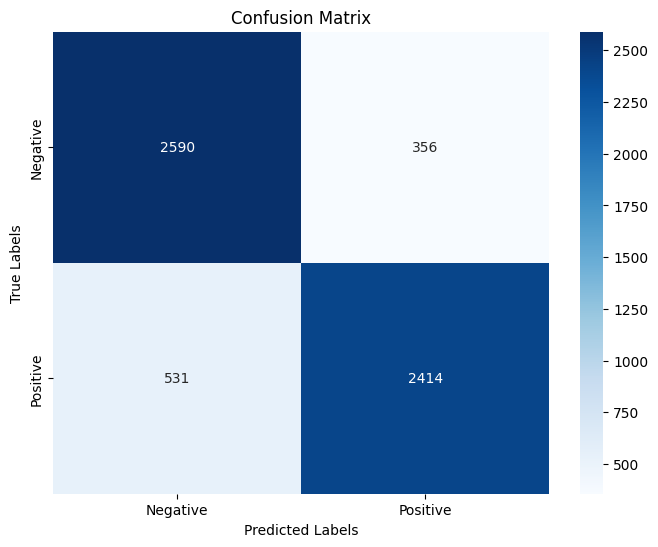

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions and true labels
predictions = trainer.predict(tokenized_test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = tokenized_test_dataset['label']

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Print the classification report
print("Classification Report:")
print(classification_report(true_labels, pred_labels))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


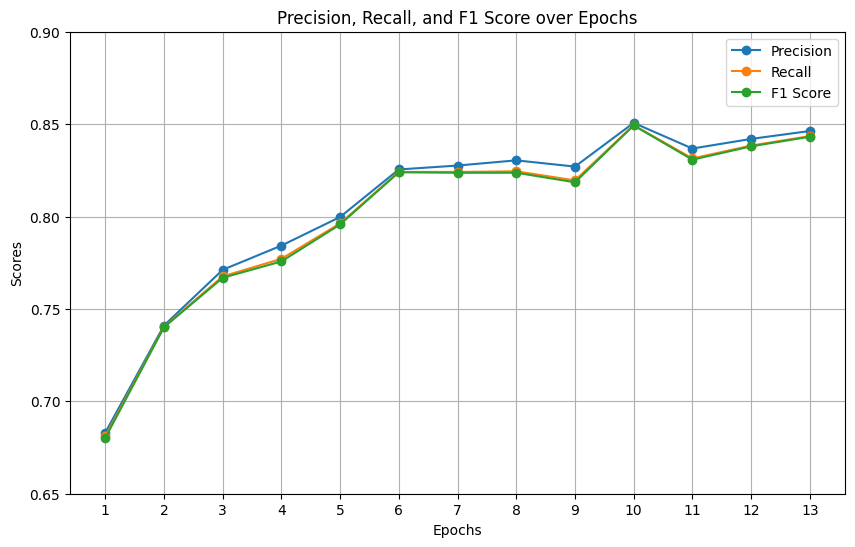

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(1, 14))
precision = [0.683025, 0.741011, 0.771162, 0.784265, 0.799751, 0.825466, 0.827585, 0.830393, 0.827023, 0.850671, 0.836784, 0.841996, 0.846275]
recall = [0.681030, 0.740286, 0.767602, 0.777104, 0.796290, 0.824133, 0.824130, 0.824467, 0.819542, 0.849426, 0.831427, 0.838389, 0.843482]
f1_score = [0.680165, 0.740088, 0.766844, 0.775702, 0.795708, 0.823957, 0.823672, 0.823685, 0.818515, 0.849297, 0.830763, 0.837969, 0.843173]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, precision, marker='o', label='Precision')
plt.plot(epochs, recall, marker='o', label='Recall')
plt.plot(epochs, f1_score, marker='o', label='F1 Score')

# Adding title and labels
plt.title('Precision, Recall, and F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.xticks(epochs)
plt.ylim(0.65, 0.90)

# Adding a grid
plt.grid(True)

# Adding a legend
plt.legend()

# Show plot
plt.show()


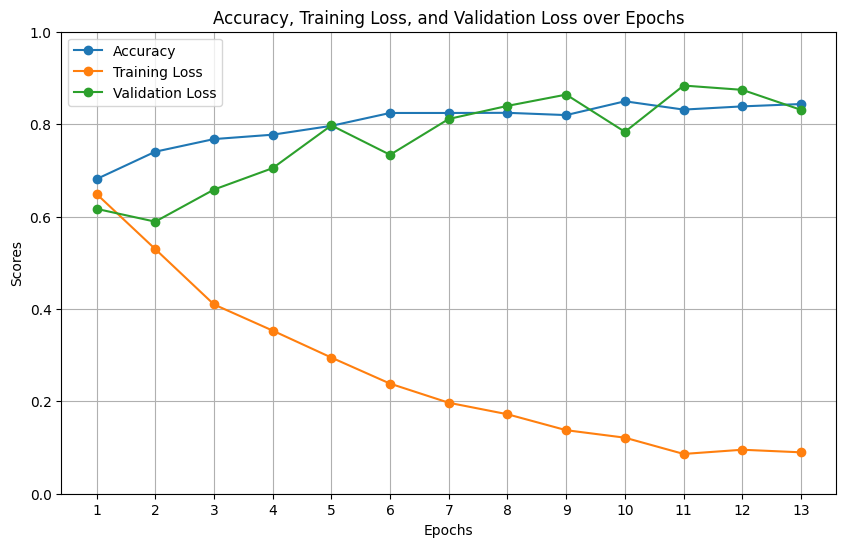

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(1, 14))
accuracy = [0.681039, 0.740282, 0.767612, 0.777118, 0.796299, 0.824139, 0.824139, 0.824478, 0.819555, 0.849431, 0.831438, 0.838398, 0.843490]
training_loss = [0.648900, 0.529600, 0.409700, 0.353100, 0.294700, 0.238300, 0.196900, 0.172000, 0.137500, 0.121300, 0.086100, 0.095200, 0.089600]
validation_loss = [0.616622, 0.588879, 0.658304, 0.704720, 0.797245, 0.733612, 0.811186, 0.839513, 0.863915, 0.783284, 0.883478, 0.874184, 0.830848]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o', label='Accuracy')
plt.plot(epochs, training_loss, marker='o', label='Training Loss')
plt.plot(epochs, validation_loss, marker='o', label='Validation Loss')

# Adding title and labels
plt.title('Accuracy, Training Loss, and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.xticks(epochs)
plt.ylim(0, 1.0)

# Adding a grid
plt.grid(True)

# Adding a legend
plt.legend()

# Show plot
plt.show()


Testing on Distil BERT

Repo card metadata block was not found. Setting CardData to empty.
<ipython-input-13-9018f4e5e38d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']


label
1    14726
0    14726
Name: count, dtype: int64


Map:   0%|          | 0/23561 [00:00<?, ? examples/s]

Map:   0%|          | 0/5891 [00:00<?, ? examples/s]

Map:   0%|          | 0/23561 [00:00<?, ? examples/s]

Map:   0%|          | 0/5891 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.634500,0.590133,0.708369,0.708339,0.708455,0.708370
2,0.452500,0.520325,0.781361,0.780789,0.784312,0.781353


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.634500,0.590133,0.708369,0.708339,0.708455,0.708370
2,0.452500,0.520325,0.781361,0.780789,0.784312,0.781353
3,0.344000,0.619637,0.815142,0.814464,0.819790,0.815132
4,0.220100,0.797915,0.840944,0.840688,0.843130,0.840937
5,0.143300,0.783380,0.864030,0.863903,0.865382,0.864025
6,0.098500,1.137920,0.832626,0.831027,0.845668,0.832610
7,0.045300,0.975026,0.865048,0.864743,0.868357,0.865040
8,0.043100,1.098562,0.855712,0.855067,0.862131,0.855701
9,0.010700,1.162186,0.865897,0.865578,0.869384,0.865889
10,0.015200,1.155588,0.867595,0.867275,0.871147,0.867586


Training and Evaluation Metrics:
{'train_loss': [0.6893, 0.6833, 0.6649, 0.6455, 0.6444, 0.6345, 0.6124, 0.5348, 0.5111, 0.4853, 0.4758, 0.4525, 0.4255, 0.3516, 0.3377, 0.3602, 0.3533, 0.344, 0.2811, 0.2138, 0.2205, 0.2031, 0.243, 0.2201, 0.1832, 0.1544, 0.1243, 0.1282, 0.1252, 0.1433, 0.0934, 0.0808, 0.0943, 0.0819, 0.0865, 0.0985, 0.0569, 0.0574, 0.0429, 0.0468, 0.0411, 0.0453, 0.0323, 0.0209, 0.0243, 0.039, 0.0282, 0.0431, 0.0196, 0.0216, 0.0163, 0.0247, 0.0101, 0.0107, 0.0042, 0.0136, 0.012, 0.013, 0.0152], 'eval_loss': [0.5901325941085815, 0.5203254818916321, 0.6196370124816895, 0.7979145646095276, 0.7833803296089172, 1.1379201412200928, 0.9750256538391113, 1.098562240600586, 1.1621860265731812, 1.155587911605835], 'train_accuracy': [], 'eval_accuracy': [0.7083686980139196, 0.7813613987438466, 0.8151417416397895, 0.8409438125954847, 0.8640298760821592, 0.8326260397216092, 0.865048378883042, 0.8557121032082838, 0.8658971312171109, 0.8675946358852487]}


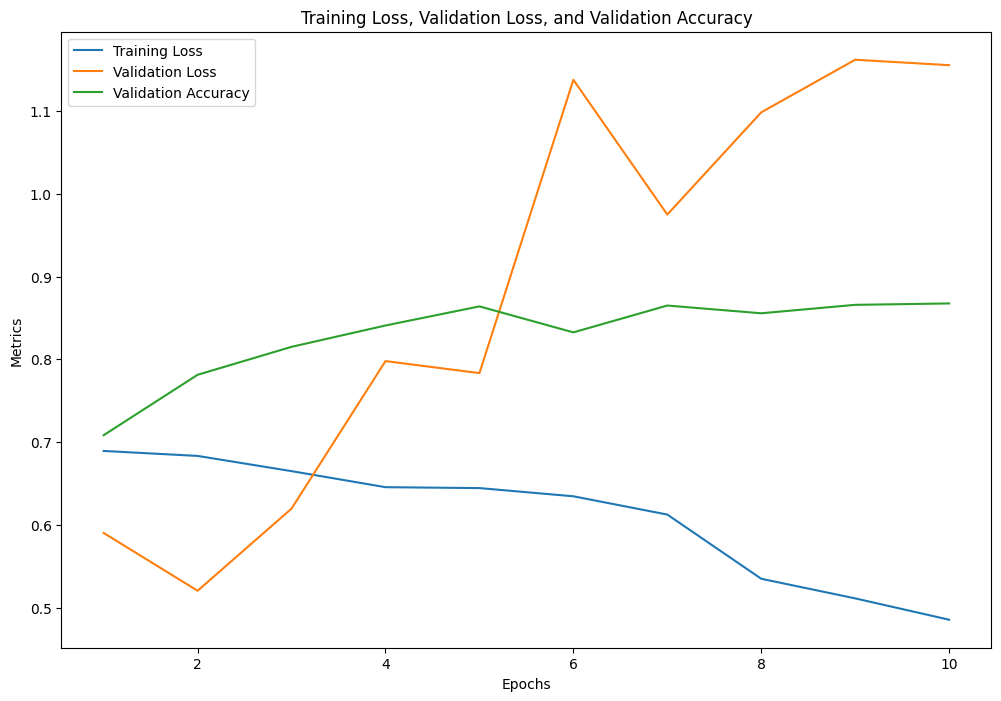

Classification Report:
               precision    recall  f1-score   support

        Mild       0.83      0.92      0.87      2946
      Severe       0.91      0.81      0.86      2945

    accuracy                           0.87      5891
   macro avg       0.87      0.87      0.87      5891
weighted avg       0.87      0.87      0.87      5891



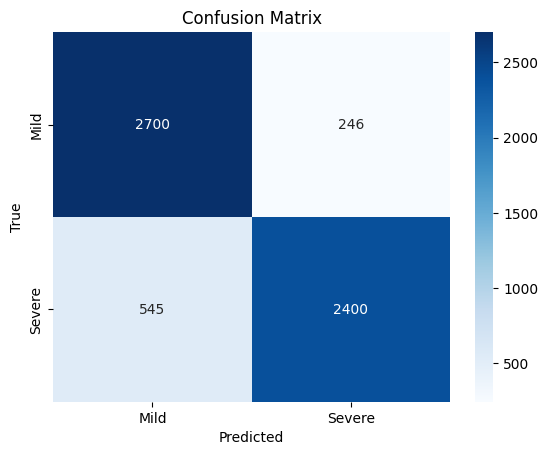

In [ ]:
!pip install evaluate transformers datasets seaborn

import torch
from transformers import DistilBertConfig, DistilBertForSequenceClassification, DistilBertTokenizerFast, TrainingArguments, Trainer, EvalPrediction, EarlyStoppingCallback, TrainerCallback
from datasets import load_dataset, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import class_weight, resample
import evaluate

# Load the dataset from Hugging Face
dataset = load_dataset("solomonk/reddit_mental_health_posts")

# Convert to pandas dataframe for analysis
df = dataset['train'].to_pandas()

# Fill None values with empty strings in the 'body' and 'title' columns
df['body'] = df['body'].fillna('')
df['title'] = df['title'].fillna('')

# Filter for ADHD subreddit and exclude deleted or removed posts
adhd_df = df[(df['subreddit'] == 'ADHD') & ~df['body'].str.lower().str.contains('\[deleted\]|\[removed\]')]

# Combine title and body for analysis
adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']

# Remove the unnecessary columns
adhd_df = adhd_df.drop(columns=['author', 'created_utc', 'num_comments', 'url'])

# Cap the scores at 5
adhd_df['score'] = adhd_df['score'].apply(lambda x: min(x, 5))

# Define label based on score
adhd_df['label'] = adhd_df['score'].apply(lambda x: 0 if x <= 1 else 1)

# Select only the relevant columns for the final dataset
adhd_final_df = adhd_df[['text', 'label']]

# Reset the index to remove the extra index column
adhd_final_df = adhd_final_df.reset_index(drop=True)

# Separate majority and minority classes
df_mild = adhd_final_df[adhd_final_df.label == 0]
df_severe = adhd_final_df[adhd_final_df.label == 1]

# Upsample minority class
df_mild_upsampled = resample(df_mild,
                             replace=True,    # sample with replacement
                             n_samples=len(df_severe),     # to match majority class
                             random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_severe, df_mild_upsampled])

# Display new class counts
print(df_balanced.label.value_counts())

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df_balanced, test_size=0.2, stratify=df_balanced['label'], random_state=42)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Load Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Tokenization Function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

# Ensure the labels are included in the tokenized dataset
def add_labels(example):
    example['labels'] = example['label']
    return example

tokenized_train_dataset = tokenized_train_dataset.map(add_labels)
tokenized_test_dataset = tokenized_test_dataset.map(add_labels)

# Create DistilBERT Model for ADHD classification
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_df['label']), y=train_df['label'])
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define the loss function with class weights
class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.logits  # Extract logits correctly
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training Arguments and Trainer Setup
training_args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    evaluation_strategy="epoch",
    logging_dir='./logs_adhd',
    logging_steps=500,
    do_train=True,
    do_eval=True,
    output_dir='./results_adhd',
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_strategy="epoch",
    report_to="none",
    weight_decay=0.01,
    logging_first_step=True,
)

# Define Metrics Calculation
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(p: EvalPrediction):
    preds = p.predictions.argmax(-1)
    accuracy = accuracy_metric.compute(predictions=preds, references=p.label_ids)["accuracy"]
    f1 = f1_metric.compute(predictions=preds, references=p.label_ids, average="macro")["f1"]
    precision = precision_metric.compute(predictions=preds, references=p.label_ids, average="macro")["precision"]
    recall = recall_metric.compute(predictions=preds, references=p.label_ids, average="macro")["recall"]
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}

# Define Trainer Callback for Metrics Logging
class MetricsCallback(TrainerCallback):
    def __init__(self):
        self.metrics = {"train_loss": [], "eval_loss": [], "train_accuracy": [], "eval_accuracy": []}

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            if "loss" in logs:
                self.metrics["train_loss"].append(logs["loss"])
            if "eval_loss" in logs:
                self.metrics["eval_loss"].append(logs["eval_loss"])
            if "eval_accuracy" in logs:
                self.metrics["eval_accuracy"].append(logs["eval_accuracy"])
            if "train_accuracy" in logs:
                self.metrics["train_accuracy"].append(logs["train_accuracy"])

metrics_callback = MetricsCallback()

# Set up Trainer with Early Stopping
early_stopping = EarlyStoppingCallback(early_stopping_patience=3)

trainer = WeightedLossTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[metrics_callback, early_stopping]
)

# Train and Evaluate the Model
trainer.train()

# Print Metrics
print("Training and Evaluation Metrics:")
print(metrics_callback.metrics)

# Plot the Metrics
def plot_metrics(metrics):
    plt.figure(figsize=(12, 8))
    epochs = range(1, len(metrics["eval_loss"]) + 1)

    plt.plot(epochs, metrics["train_loss"][:len(epochs)], label="Training Loss")
    plt.plot(epochs, metrics["eval_loss"], label="Validation Loss")
    plt.plot(epochs, metrics["eval_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Metrics")
    plt.title("Training Loss, Validation Loss, and Validation Accuracy")
    plt.legend()
    plt.show()

plot_metrics(metrics_callback.metrics)

# Adjust threshold for predictions
def adjust_threshold(outputs, threshold=0.5):
    return (outputs[:, 1] > threshold).astype(int)

# Generate Classification Report and Confusion Matrix

# Predict the labels on the test set
predictions = trainer.predict(tokenized_test_dataset)
predicted_labels = adjust_threshold(predictions.predictions, threshold=0.6)

# Generate classification report
report = classification_report(tokenized_test_dataset['label'], predicted_labels, target_names=['Mild', 'Severe'])
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(tokenized_test_dataset['label'], predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Mild', 'Severe'], yticklabels=['Mild', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


generating graphs

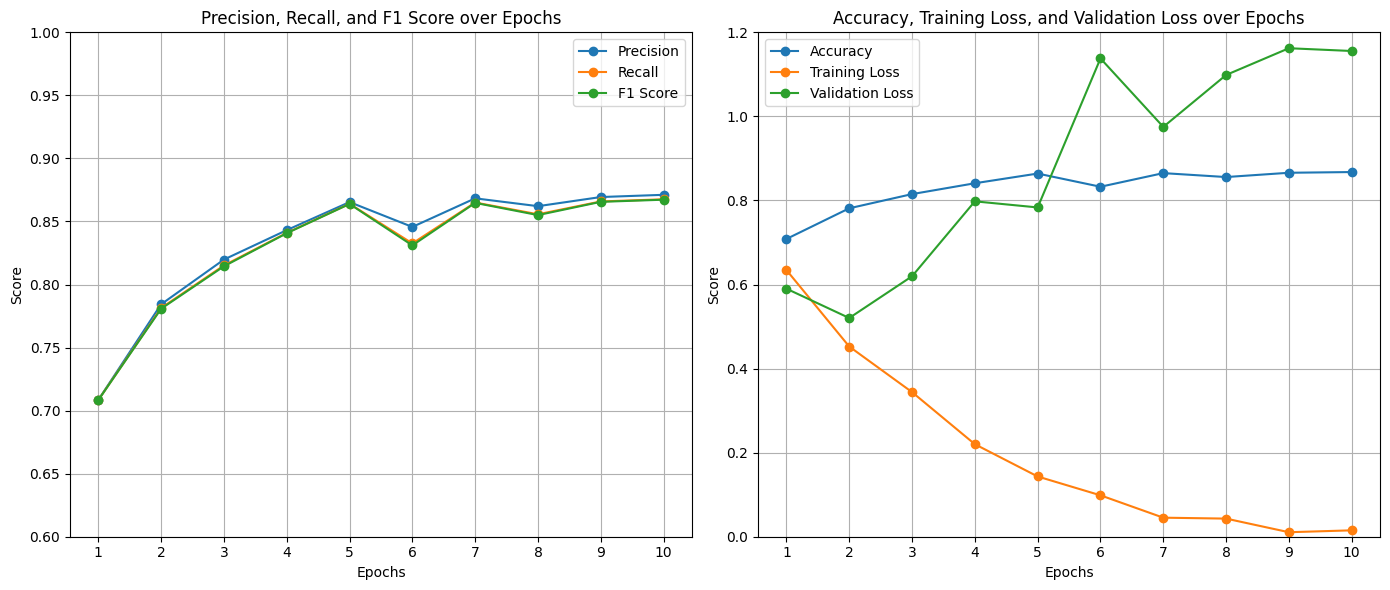

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(1, 11))
training_loss = [0.634500, 0.452500, 0.344000, 0.220100, 0.143300, 0.098500, 0.045300, 0.043100, 0.010700, 0.015200]
validation_loss = [0.590133, 0.520325, 0.619637, 0.797915, 0.783380, 1.137920, 0.975026, 1.098562, 1.162186, 1.155588]
accuracy = [0.708369, 0.781361, 0.815142, 0.840944, 0.864030, 0.832626, 0.865048, 0.855712, 0.865897, 0.867595]
precision = [0.708455, 0.784312, 0.819790, 0.843130, 0.865382, 0.845668, 0.868357, 0.862131, 0.869384, 0.871147]
recall = [0.708370, 0.781353, 0.815132, 0.840937, 0.864025, 0.832610, 0.865040, 0.855701, 0.865889, 0.867586]
f1_score = [0.708339, 0.780789, 0.814464, 0.840688, 0.863903, 0.831027, 0.864743, 0.855067, 0.865578, 0.867275]

# Plot Precision, Recall, F1 Score
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, precision, marker='o', label='Precision')
plt.plot(epochs, recall, marker='o', label='Recall')
plt.plot(epochs, f1_score, marker='o', label='F1 Score')
plt.title('Precision, Recall, and F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.xticks(epochs)
plt.ylim(0.6, 1.0)
plt.grid(True)
plt.legend()

# Plot Accuracy, Training Loss, Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, marker='o', label='Accuracy')
plt.plot(epochs, training_loss, marker='o', label='Training Loss')
plt.plot(epochs, validation_loss, marker='o', label='Validation Loss')
plt.title('Accuracy, Training Loss, and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.xticks(epochs)
plt.ylim(0, 1.2)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


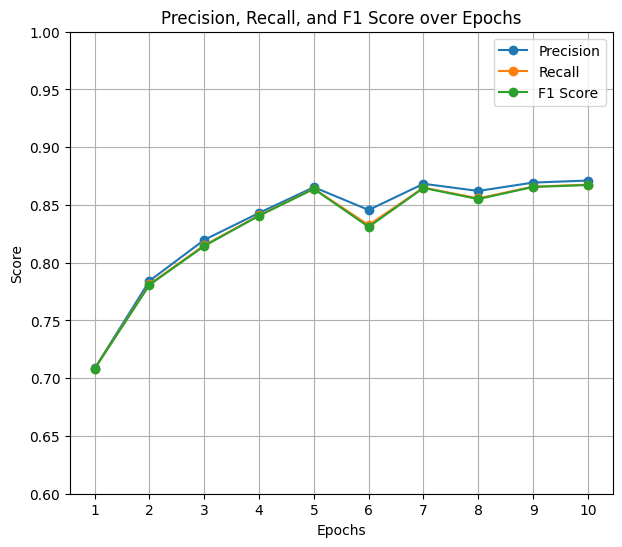

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(1, 11))

precision = [0.708455, 0.784312, 0.819790, 0.843130, 0.865382, 0.845668, 0.868357, 0.862131, 0.869384, 0.871147]
recall = [0.708370, 0.781353, 0.815132, 0.840937, 0.864025, 0.832610, 0.865040, 0.855701, 0.865889, 0.867586]
f1_score = [0.708339, 0.780789, 0.814464, 0.840688, 0.863903, 0.831027, 0.864743, 0.855067, 0.865578, 0.867275]

# Plot Precision, Recall, F1 Score
plt.figure(figsize=(7, 6))
plt.plot(epochs, precision, marker='o', label='Precision')
plt.plot(epochs, recall, marker='o', label='Recall')
plt.plot(epochs, f1_score, marker='o', label='F1 Score')
plt.title('Precision, Recall, and F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.xticks(epochs)
plt.ylim(0.6, 1.0)
plt.grid(True)
plt.legend()
plt.show()


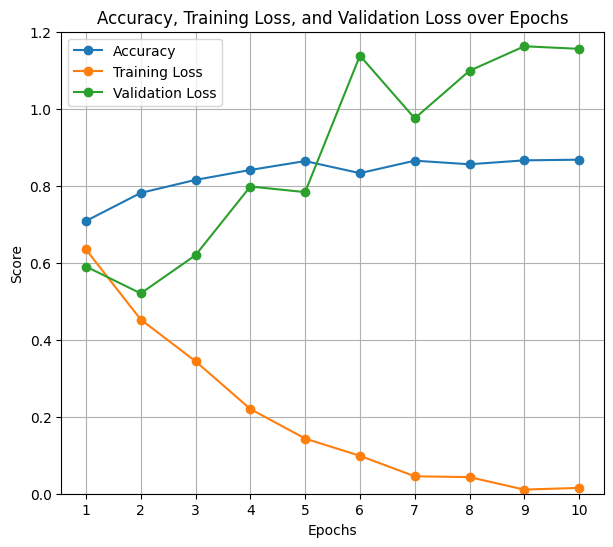

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(1, 11))
training_loss = [0.634500, 0.452500, 0.344000, 0.220100, 0.143300, 0.098500, 0.045300, 0.043100, 0.010700, 0.015200]
validation_loss = [0.590133, 0.520325, 0.619637, 0.797915, 0.783380, 1.137920, 0.975026, 1.098562, 1.162186, 1.155588]
accuracy = [0.708369, 0.781361, 0.815142, 0.840944, 0.864030, 0.832626, 0.865048, 0.855712, 0.865897, 0.867595]


# Plot Accuracy, Training Loss, Validation Loss
plt.figure(figsize=(7, 6))
plt.plot(epochs, accuracy, marker='o', label='Accuracy')
plt.plot(epochs, training_loss, marker='o', label='Training Loss')
plt.plot(epochs, validation_loss, marker='o', label='Validation Loss')
plt.title('Accuracy, Training Loss, and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.xticks(epochs)
plt.ylim(0, 1.2)
plt.grid(True)
plt.legend()
plt.show()


testing on clinical bert

Repo card metadata block was not found. Setting CardData to empty.
<ipython-input-14-6d60066724ea>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']


label
1    14726
0    14726
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Map:   0%|          | 0/23561 [00:00<?, ? examples/s]

Map:   0%|          | 0/5891 [00:00<?, ? examples/s]

Map:   0%|          | 0/23561 [00:00<?, ? examples/s]

Map:   0%|          | 0/5891 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.707400,0.699382,0.499915,0.333296,0.249958,0.500000
2,0.703200,0.693240,0.499915,0.333296,0.249958,0.500000
3,0.702200,0.694854,0.499915,0.333296,0.249958,0.500000
4,0.701400,0.693485,0.499915,0.333296,0.249958,0.500000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Training and Evaluation Metrics:
{'train_loss': [0.6262, 0.6945, 0.6871, 0.7096, 0.7045, 0.7074, 0.7073, 0.7049, 0.7003, 0.6998, 0.7022, 0.7032, 0.7069, 0.7043, 0.7031, 0.7013, 0.7014, 0.7022, 0.7052, 0.7001, 0.6987, 0.7001, 0.7006, 0.7014], 'eval_loss': [0.6993817090988159, 0.6932397484779358, 0.6948543787002563, 0.6934852004051208], 'train_accuracy': [], 'eval_accuracy': [0.4999151247665931, 0.4999151247665931, 0.4999151247665931, 0.4999151247665931]}


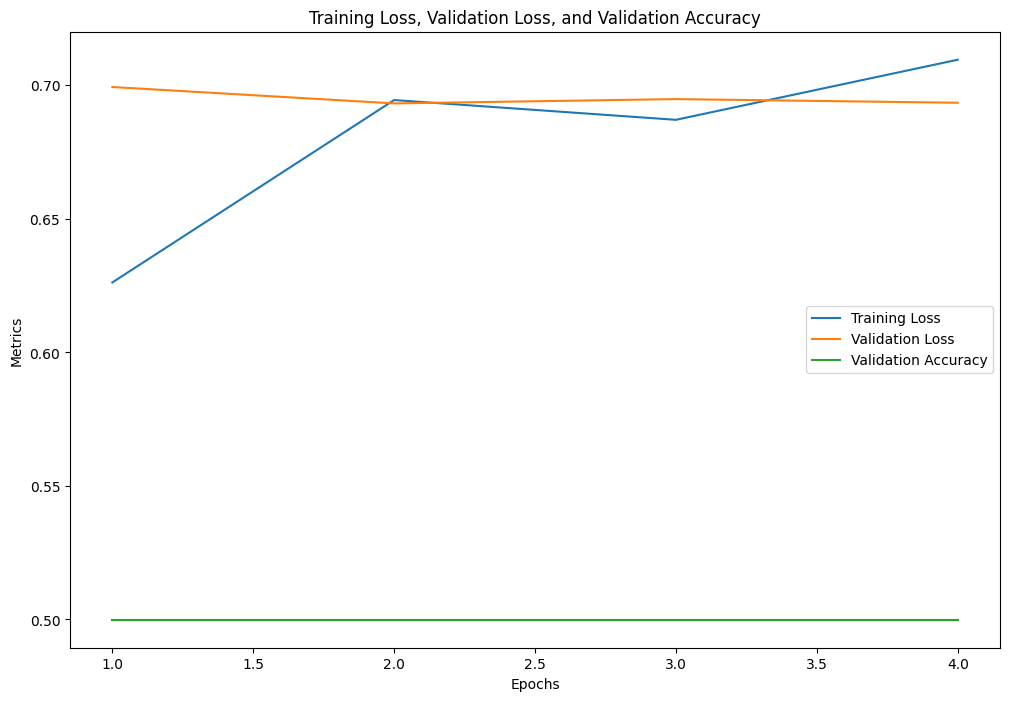

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Classification Report:
               precision    recall  f1-score   support

        Mild       0.50      1.00      0.67      2946
      Severe       0.00      0.00      0.00      2945

    accuracy                           0.50      5891
   macro avg       0.25      0.50      0.33      5891
weighted avg       0.25      0.50      0.33      5891



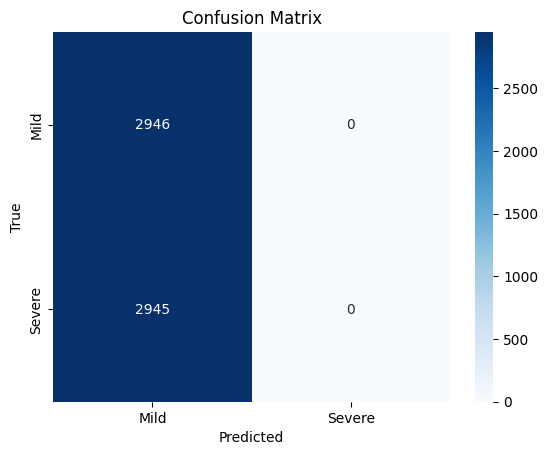

In [ ]:
!pip install evaluate transformers datasets seaborn

import torch
from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer, EvalPrediction, EarlyStoppingCallback, TrainerCallback
from datasets import load_dataset, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import class_weight, resample
import evaluate

# Load the dataset from Hugging Face
dataset = load_dataset("solomonk/reddit_mental_health_posts")

# Convert to pandas dataframe for analysis
df = dataset['train'].to_pandas()

# Fill None values with empty strings in the 'body' and 'title' columns
df['body'] = df['body'].fillna('')
df['title'] = df['title'].fillna('')

# Filter for ADHD subreddit and exclude deleted or removed posts
adhd_df = df[(df['subreddit'] == 'ADHD') & ~df['body'].str.lower().str.contains('\[deleted\]|\[removed\]')]

# Combine title and body for analysis
adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']

# Remove the unnecessary columns
adhd_df = adhd_df.drop(columns=['author', 'created_utc', 'num_comments', 'url'])

# Cap the scores at 5
adhd_df['score'] = adhd_df['score'].apply(lambda x: min(x, 5))

# Define label based on score
adhd_df['label'] = adhd_df['score'].apply(lambda x: 0 if x <= 1 else 1)

# Select only the relevant columns for the final dataset
adhd_final_df = adhd_df[['text', 'label']]

# Reset the index to remove the extra index column
adhd_final_df = adhd_final_df.reset_index(drop=True)

# Separate majority and minority classes
df_mild = adhd_final_df[adhd_final_df.label == 0]
df_severe = adhd_final_df[adhd_final_df.label == 1]

# Upsample minority class
df_mild_upsampled = resample(df_mild,
                             replace=True,    # sample with replacement
                             n_samples=len(df_severe),     # to match majority class
                             random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_severe, df_mild_upsampled])

# Display new class counts
print(df_balanced.label.value_counts())

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df_balanced, test_size=0.2, stratify=df_balanced['label'], random_state=42)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Load Tokenizer
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# Tokenization Function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

# Ensure the labels are included in the tokenized dataset
def add_labels(example):
    example['labels'] = example['label']
    return example

tokenized_train_dataset = tokenized_train_dataset.map(add_labels)
tokenized_test_dataset = tokenized_test_dataset.map(add_labels)

# Create ClinicalBERT Model for ADHD classification
model = AutoModelForSequenceClassification.from_pretrained("emilyalsentzer/Bio_ClinicalBERT", num_labels=2)

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_df['label']), y=train_df['label'])
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define the loss function with class weights
class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.logits  # Extract logits correctly
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training Arguments and Trainer Setup
training_args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    evaluation_strategy="epoch",
    logging_dir='./logs_adhd',
    logging_steps=500,
    do_train=True,
    do_eval=True,
    output_dir='./results_adhd',
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_strategy="epoch",
    report_to="none",
    weight_decay=0.01,
    logging_first_step=True,
)

# Define Metrics Calculation
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(p: EvalPrediction):
    preds = p.predictions.argmax(-1)
    accuracy = accuracy_metric.compute(predictions=preds, references=p.label_ids)["accuracy"]
    f1 = f1_metric.compute(predictions=preds, references=p.label_ids, average="macro")["f1"]
    precision = precision_metric.compute(predictions=preds, references=p.label_ids, average="macro")["precision"]
    recall = recall_metric.compute(predictions=preds, references=p.label_ids, average="macro")["recall"]
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}

# Define Trainer Callback for Metrics Logging
class MetricsCallback(TrainerCallback):
    def __init__(self):
        self.metrics = {"train_loss": [], "eval_loss": [], "train_accuracy": [], "eval_accuracy": []}

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            if "loss" in logs:
                self.metrics["train_loss"].append(logs["loss"])
            if "eval_loss" in logs:
                self.metrics["eval_loss"].append(logs["eval_loss"])
            if "eval_accuracy" in logs:
                self.metrics["eval_accuracy"].append(logs["eval_accuracy"])
            if "train_accuracy" in logs:
                self.metrics["train_accuracy"].append(logs["train_accuracy"])

metrics_callback = MetricsCallback()

# Set up Trainer with Early Stopping
early_stopping = EarlyStoppingCallback(early_stopping_patience=3)

trainer = WeightedLossTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[metrics_callback, early_stopping]
)

# Train and Evaluate the Model
trainer.train()

# Print Metrics
print("Training and Evaluation Metrics:")
print(metrics_callback.metrics)

# Plot the Metrics
def plot_metrics(metrics):
    plt.figure(figsize=(12, 8))
    epochs = range(1, len(metrics["eval_loss"]) + 1)

    plt.plot(epochs, metrics["train_loss"][:len(epochs)], label="Training Loss")
    plt.plot(epochs, metrics["eval_loss"], label="Validation Loss")
    plt.plot(epochs, metrics["eval_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Metrics")
    plt.title("Training Loss, Validation Loss, and Validation Accuracy")
    plt.legend()
    plt.show()

plot_metrics(metrics_callback.metrics)

# Adjust threshold for predictions
def adjust_threshold(outputs, threshold=0.5):
    return (outputs[:, 1] > threshold).astype(int)

# Generate Classification Report and Confusion Matrix

# Predict the labels on the test set
predictions = trainer.predict(tokenized_test_dataset)
predicted_labels = adjust_threshold(predictions.predictions, threshold=0.6)

# Generate classification report
report = classification_report(tokenized_test_dataset['label'], predicted_labels, target_names=['Mild', 'Severe'])
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(tokenized_test_dataset['label'], predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Mild', 'Severe'], yticklabels=['Mild', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from transformers import AutoModel

# Load the clinical BERT model
model_name = "emilyalsentzer/Bio_ClinicalBERT"
model = AutoModel.from_pretrained(model_name)

# Get the total number of parameters
total_parameters = sum(p.numel() for p in model.parameters())

# Calculate number of parameters in millions
parameters_in_millions = total_parameters / 1_000_000

print(f"Number of parameters in millions: {parameters_in_millions:.2f} million")


Number of parameters in millions: 108.31 million


clinical bert best results

In [ ]:
!pip install evaluate transformers datasets seaborn

import torch
from transformers import BertTokenizerFast, BertForSequenceClassification, TrainingArguments, Trainer, EvalPrediction, EarlyStoppingCallback, TrainerCallback
from datasets import load_dataset, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import class_weight, resample
import evaluate

# Load the dataset from Hugging Face
dataset = load_dataset("solomonk/reddit_mental_health_posts")

# Convert to pandas dataframe for analysis
df = dataset['train'].to_pandas()

# Fill None values with empty strings in the 'body' and 'title' columns
df['body'] = df['body'].fillna('')
df['title'] = df['title'].fillna('')

# Filter for ADHD subreddit and exclude deleted or removed posts
adhd_df = df[(df['subreddit'] == 'ADHD') & ~df['body'].str.lower().str.contains('\[deleted\]|\[removed\]')]

# Combine title and body for analysis
adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']

# Remove the unnecessary columns
adhd_df = adhd_df.drop(columns=['author', 'created_utc', 'num_comments', 'url'])

# Cap the scores at 5
adhd_df['score'] = adhd_df['score'].apply(lambda x: min(x, 5))

# Define label based on score
adhd_df['label'] = adhd_df['score'].apply(lambda x: 0 if x <= 1 else 1)

# Select only the relevant columns for the final dataset
adhd_final_df = adhd_df[['text', 'label']]

# Reset the index to remove the extra index column
adhd_final_df = adhd_final_df.reset_index(drop=True)

# Separate majority and minority classes
df_mild = adhd_final_df[adhd_final_df.label == 0]
df_severe = adhd_final_df[adhd_final_df.label == 1]

# Upsample minority class
df_mild_upsampled = resample(df_mild,
                             replace=True,    # sample with replacement
                             n_samples=len(df_severe),     # to match majority class
                             random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_severe, df_mild_upsampled])

# Display new class counts
print(df_balanced.label.value_counts())

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df_balanced, test_size=0.2, stratify=df_balanced['label'], random_state=42)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Load Tokenizer
tokenizer = BertTokenizerFast.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# Tokenization Function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

# Ensure the labels are included in the tokenized dataset
def add_labels(example):
    example['labels'] = example['label']
    return example

tokenized_train_dataset = tokenized_train_dataset.map(add_labels)
tokenized_test_dataset = tokenized_test_dataset.map(add_labels)

# Create ClinicalBERT Model for ADHD classification
model = BertForSequenceClassification.from_pretrained("emilyalsentzer/Bio_ClinicalBERT", num_labels=2)

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_df['label']), y=train_df['label'])
class_weights = torch.tensor(class_weights, dtype=torch.float)

# Define the loss function with class weights
class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        device = logits.device  # Ensure class weights are on the same device as logits
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights.to(device))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Training Arguments and Trainer Setup
training_args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=8,  # Increased number of epochs
    eval_strategy="epoch",
    logging_dir='./logs_adhd',
    logging_steps=500,
    do_train=True,
    do_eval=True,
    output_dir='./results_adhd',
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_strategy="epoch",
    report_to="none",
    weight_decay=0.01,
    learning_rate=2e-5,  # Adjusted learning rate
    logging_first_step=True,
)

# Define Metrics Calculation
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(p: EvalPrediction):
    preds = p.predictions.argmax(-1)
    accuracy = accuracy_metric.compute(predictions=preds, references=p.label_ids)["accuracy"]
    f1 = f1_metric.compute(predictions=preds, references=p.label_ids, average="macro")["f1"]
    precision = precision_metric.compute(predictions=preds, references=p.label_ids, average="macro")["precision"]
    recall = recall_metric.compute(predictions=preds, references=p.label_ids, average="macro")["recall"]
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}

# Define Trainer Callback for Metrics Logging
class MetricsCallback(TrainerCallback):
    def __init__(self):
        self.metrics = {"train_loss": [], "eval_loss": [], "train_accuracy": [], "eval_accuracy": [], "best_accuracy": 0, "best_f1": 0, "best_precision": 0, "best_recall": 0}

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            if "loss" in logs:
                self.metrics["train_loss"].append(logs["loss"])
            if "eval_loss" in logs:
                self.metrics["eval_loss"].append(logs["eval_loss"])
            if "eval_accuracy" in logs:
                eval_accuracy = logs["eval_accuracy"]
                self.metrics["eval_accuracy"].append(eval_accuracy)
                if eval_accuracy > self.metrics["best_accuracy"]:
                    self.metrics["best_accuracy"] = eval_accuracy
            if "eval_f1" in logs:
                eval_f1 = logs["eval_f1"]
                if eval_f1 > self.metrics["best_f1"]:
                    self.metrics["best_f1"] = eval_f1
            if "eval_precision" in logs:
                eval_precision = logs["eval_precision"]
                if eval_precision > self.metrics["best_precision"]:
                    self.metrics["best_precision"] = eval_precision
            if "eval_recall" in logs:
                eval_recall = logs["eval_recall"]
                if eval_recall > self.metrics["best_recall"]:
                    self.metrics["best_recall"] = eval_recall

metrics_callback = MetricsCallback()

# Set up Trainer with Early Stopping
early_stopping = EarlyStoppingCallback(early_stopping_patience=3)

trainer = WeightedLossTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[metrics_callback, early_stopping]
)

# Train and Evaluate the Model
trainer.train()

# Print Metrics
print("Training and Evaluation Metrics:")
print(metrics_callback.metrics)

# Print Best Metrics
print(f"Best Accuracy: {metrics_callback.metrics['best_accuracy']}")
print(f"Best F1 Score: {metrics_callback.metrics['best_f1']}")
print(f"Best Precision: {metrics_callback.metrics['best_precision']}")
print(f"Best Recall: {metrics_callback.metrics['best_recall']}")

# Plot the Metrics
plot_metrics(metrics_callback.metrics)

# Adjust threshold for predictions
def adjust_threshold(outputs, threshold=0.5):
    return (outputs[:, 1] > threshold).astype(int)

# Generate Classification Report and Confusion Matrix
predictions = trainer.predict(tokenized_test_dataset)
predicted_labels = adjust_threshold(predictions.predictions, threshold=0.6)

report = classification_report(tokenized_test_dataset['label'], predicted_labels, target_names=['Mild', 'Severe'])
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(tokenized_test_dataset['label'], predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Mild', 'Severe'], yticklabels=['Mild', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Repo card metadata block was not found. Setting CardData to empty.
<ipython-input-7-687cb8463faf>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df['text'] = adhd_df['title'] + ' ' + adhd_df['body']


label
1    14726
0    14726
Name: count, dtype: int64


Map:   0%|          | 0/23561 [00:00<?, ? examples/s]

Map:   0%|          | 0/5891 [00:00<?, ? examples/s]

Map:   0%|          | 0/23561 [00:00<?, ? examples/s]

Map:   0%|          | 0/5891 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.640800,0.596433,0.697505,0.697472,0.697586,0.697503
2,0.455400,0.484467,0.792565,0.792390,0.793544,0.792560
3,0.319000,0.733540,0.798336,0.796424,0.809947,0.798320
4,0.242800,0.761585,0.831098,0.830407,0.836557,0.831087
5,0.153000,0.863284,0.855203,0.855001,0.857180,0.855197
6,0.096700,0.996048,0.858258,0.857973,0.861141,0.858251
7,0.047700,1.157742,0.858428,0.858082,0.861940,0.858420
8,0.037300,1.209997,0.861653,0.861353,0.864791,0.861645


Training and Evaluation Metrics:
{'train_loss': [0.5958, 0.6934, 0.6658, 0.6556, 0.6506, 0.6408, 0.6185, 0.5336, 0.5187, 0.4965, 0.4774, 0.4554, 0.4117, 0.3326, 0.3473, 0.3553, 0.3329, 0.319, 0.3056, 0.2164, 0.2458, 0.2198, 0.2307, 0.2428, 0.1795, 0.1605, 0.1478, 0.1469, 0.1637, 0.153, 0.1253, 0.0841, 0.0938, 0.0887, 0.1192, 0.0967, 0.0773, 0.0721, 0.0596, 0.05, 0.064, 0.0477, 0.0286, 0.0281, 0.0272, 0.0357, 0.04, 0.0373], 'eval_loss': [0.596432626247406, 0.48446667194366455, 0.7335401177406311, 0.7615846991539001, 0.8632844090461731, 0.9960479736328125, 1.1577420234680176, 1.2099970579147339], 'train_accuracy': [], 'eval_accuracy': [0.6975046681378374, 0.7925649295535563, 0.798336445425225, 0.8310982855202852, 0.8552028518078425, 0.8582583602104906, 0.8584281106773044, 0.8616533695467663], 'best_accuracy': 0.8616533695467663, 'best_f1': 0.8613534310525587, 'best_precision': 0.8647906307608455, 'best_recall': 0.8616454990047222}
Best Accuracy: 0.8616533695467663
Best F1 Score: 0.861353

NameError: name 'plot_metrics' is not defined

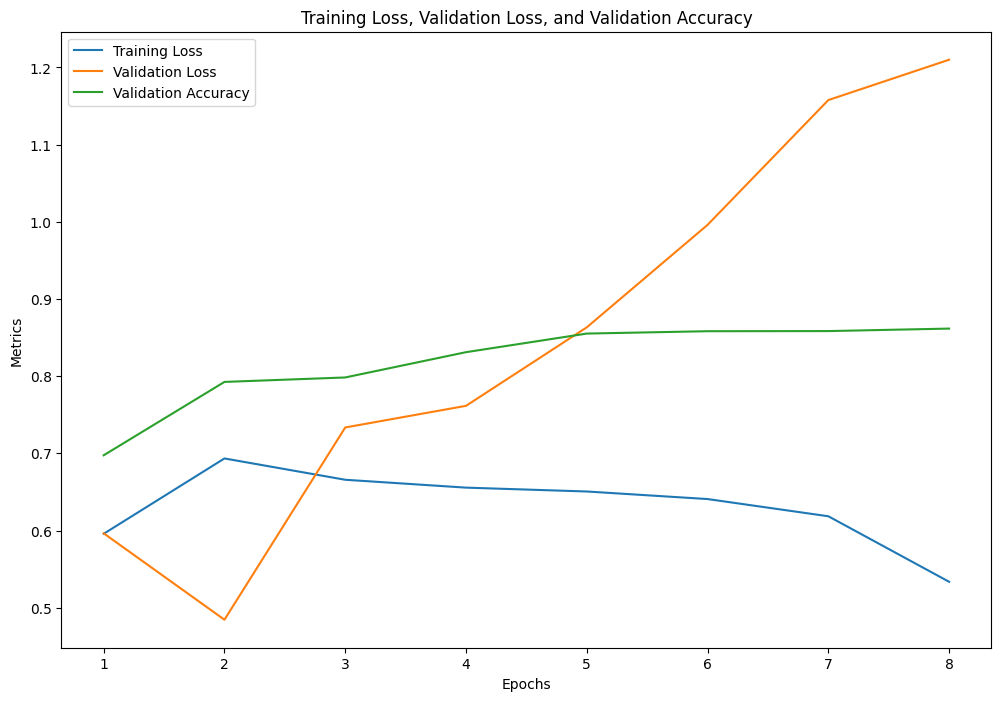

Classification Report:
               precision    recall  f1-score   support

        Mild       0.83      0.91      0.87      2946
      Severe       0.90      0.81      0.85      2945

    accuracy                           0.86      5891
   macro avg       0.86      0.86      0.86      5891
weighted avg       0.86      0.86      0.86      5891



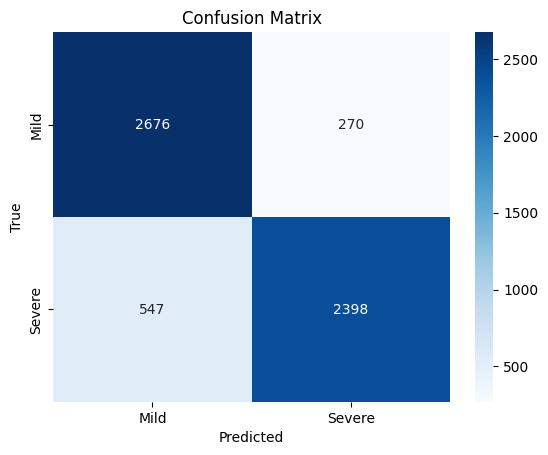

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Plot the Metrics
def plot_metrics(metrics):
    plt.figure(figsize=(12, 8))
    epochs = range(1, len(metrics["eval_loss"]) + 1)

    plt.plot(epochs, metrics["train_loss"][:len(epochs)], label="Training Loss")
    plt.plot(epochs, metrics["eval_loss"], label="Validation Loss")
    plt.plot(epochs, metrics["eval_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Metrics")
    plt.title("Training Loss, Validation Loss, and Validation Accuracy")
    plt.legend()
    plt.show()

plot_metrics(metrics_callback.metrics)

# Adjust threshold for predictions
def adjust_threshold(outputs, threshold=0.5):
    return (outputs[:, 1] > threshold).astype(int)

# Generate Classification Report and Confusion Matrix

# Predict the labels on the test set
predictions = trainer.predict(tokenized_test_dataset)
predicted_labels = adjust_threshold(predictions.predictions, threshold=0.6)

# Generate classification report
report = classification_report(tokenized_test_dataset['label'], predicted_labels, target_names=['Mild', 'Severe'])
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(tokenized_test_dataset['label'], predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Mild', 'Severe'], yticklabels=['Mild', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


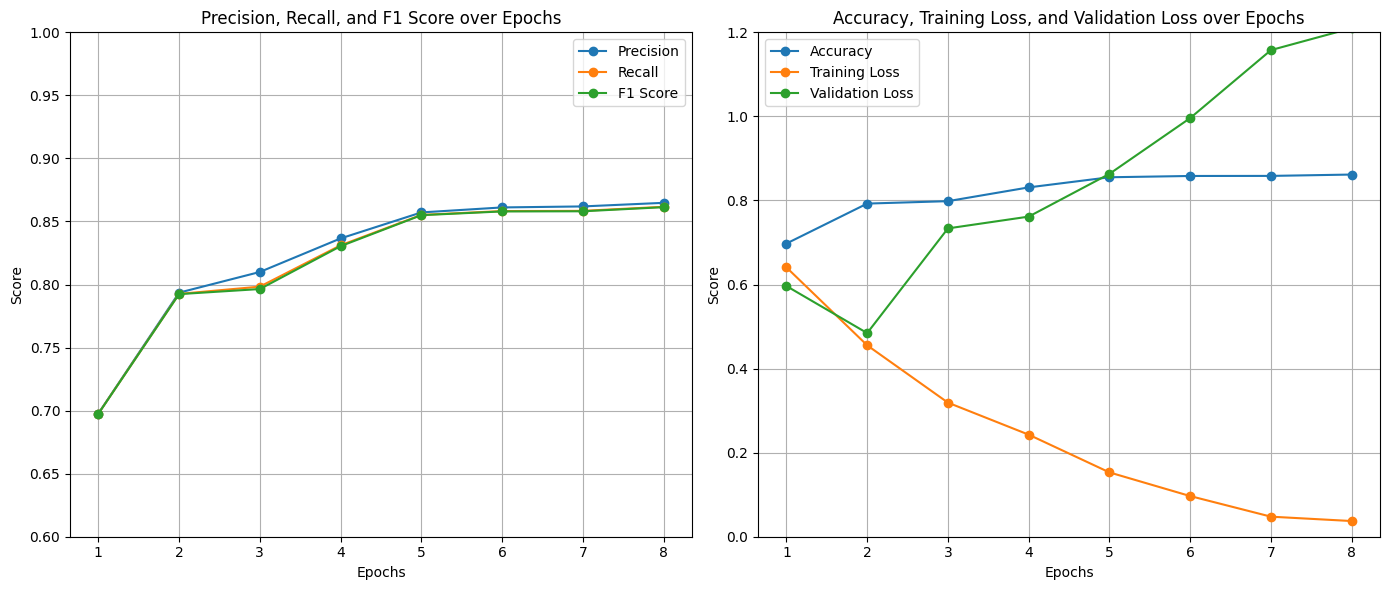

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(1, 9))
training_loss = [0.640800, 0.455400, 0.319000, 0.242800, 0.153000, 0.096700, 0.047700, 0.037300]
validation_loss = [0.596433, 0.484467, 0.733540, 0.761585, 0.863284, 0.996048, 1.157742, 1.209997]
accuracy = [0.697505, 0.792565, 0.798336, 0.831098, 0.855203, 0.858258, 0.858428, 0.861653]
precision = [0.697586, 0.793544, 0.809947, 0.836557, 0.857180, 0.861141, 0.861940, 0.864791]
recall = [0.697503, 0.792560, 0.798320, 0.831087, 0.855197, 0.858251, 0.858420, 0.861645]
f1_score = [0.697472, 0.792390, 0.796424, 0.830407, 0.855001, 0.857973, 0.858082, 0.861353]

# Plot Precision, Recall, F1 Score
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, precision, marker='o', label='Precision')
plt.plot(epochs, recall, marker='o', label='Recall')
plt.plot(epochs, f1_score, marker='o', label='F1 Score')
plt.title('Precision, Recall, and F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.xticks(epochs)
plt.ylim(0.6, 1.0)
plt.grid(True)
plt.legend()

# Plot Accuracy, Training Loss, Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, marker='o', label='Accuracy')
plt.plot(epochs, training_loss, marker='o', label='Training Loss')
plt.plot(epochs, validation_loss, marker='o', label='Validation Loss')
plt.title('Accuracy, Training Loss, and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.xticks(epochs)
plt.ylim(0, 1.2)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


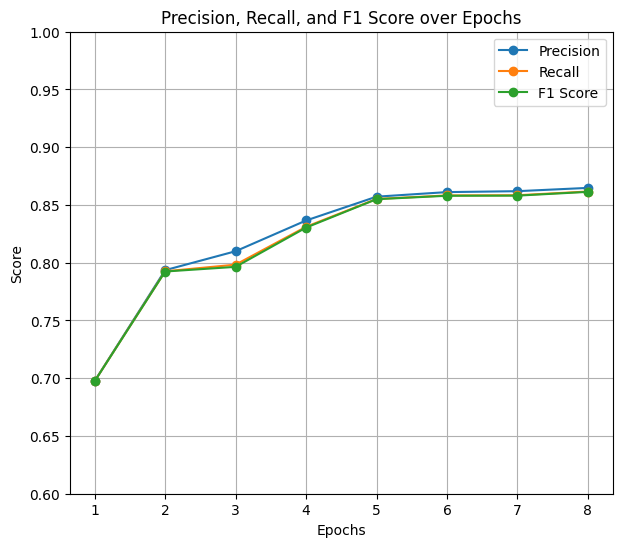

In [ ]:
import matplotlib.pyplot as plt

# Data for Precision, Recall, and F1 Score
epochs = list(range(1, 9))
precision = [0.697586, 0.793544, 0.809947, 0.836557, 0.857180, 0.861141, 0.861940, 0.864791]
recall = [0.697503, 0.792560, 0.798320, 0.831087, 0.855197, 0.858251, 0.858420, 0.861645]
f1_score = [0.697472, 0.792390, 0.796424, 0.830407, 0.855001, 0.857973, 0.858082, 0.861353]

# Plot Precision, Recall, F1 Score
plt.figure(figsize=(7, 6))
plt.plot(epochs, precision, marker='o', label='Precision')
plt.plot(epochs, recall, marker='o', label='Recall')
plt.plot(epochs, f1_score, marker='o', label='F1 Score')
plt.title('Precision, Recall, and F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.xticks(epochs)
plt.ylim(0.6, 1.0)
plt.grid(True)
plt.legend()
plt.show()


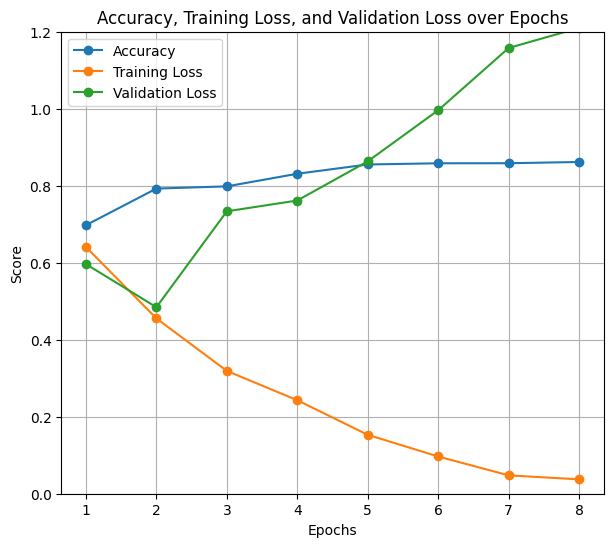

In [ ]:
import matplotlib.pyplot as plt

# Data for Accuracy, Training Loss, and Validation Loss
epochs = list(range(1, 9))
training_loss = [0.640800, 0.455400, 0.319000, 0.242800, 0.153000, 0.096700, 0.047700, 0.037300]
validation_loss = [0.596433, 0.484467, 0.733540, 0.761585, 0.863284, 0.996048, 1.157742, 1.209997]
accuracy = [0.697505, 0.792565, 0.798336, 0.831098, 0.855203, 0.858258, 0.858428, 0.861653]

# Plot Accuracy, Training Loss, Validation Loss
plt.figure(figsize=(7, 6))
plt.plot(epochs, accuracy, marker='o', label='Accuracy')
plt.plot(epochs, training_loss, marker='o', label='Training Loss')
plt.plot(epochs, validation_loss, marker='o', label='Validation Loss')
plt.title('Accuracy, Training Loss, and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.xticks(epochs)
plt.ylim(0, 1.2)
plt.grid(True)
plt.legend()
plt.show()
